## Código del proyecto


## 1. ELEGIR TEMÁTICA

La temática estará relacionada con las platas solares fotovoltaicas en Europa.
Me gustaría conocer si los países europeos que apuestan por está energía renovable es únicamente por la irradiancia solar que reciben o si hay algún parámetro más que afecte.


## 2. OBTENCIÓN DE DATOS

He buscado en las siguientes plataformas que datos hay disponibles para Europa:

-	https://datacommons.org/

	Población total, Esperanza de vida, Personas desempleadas, Nivel de educación, Generación anual de energía solar, Capacidad instalada de energía solar, Flujo financiero de apoyo a la energía solar, Precipitación media, Superficie país
-	https://datacatalog.worldbank.org

	Irradiancia solar, Desarrollo humano, PIB, Consumo energía, Coste de construcción

	
En líneas generales, los datos estaban aceptables y manejables a excepción de la precipitación media. Estos datos han tenido que ser buscados en reiteradas ocasiones puesto que no eran representativos. 
Con el resto de los datos no se han necesitado hacer más búsquedas.


## 3. DEFINICIÓN DE HIPÓTESIS

Las plantas fotovoltaicas...
-	¿Dependen exclusivamente de la irradiación horizontal global (GHI)?
-	¿Qué características tiene un país europeo que apuesta por la energía solar fotovoltaica?
-	¿Dependerá del tipo de población?
    	Habitantes / km2, Desarrollo humano, Consumo energético medio
-	¿Dependerá del clima?
    	Precipitaciones medias
-	¿Dependerá de la superficie del país?
        Superficie km2
-	¿Dependerá de parámetros económicos?
        PIB, Coste de construcción


## 4. PROCESADO DE DATOS

Importamos bibliotecas

In [271]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Cargamos archivos e informacion, en el proyecto del EDA ya limpiamos los datos. Solo nos quedamos con los paises Europeos.

In [272]:

# Ruta info de irradiancia
file_path = "./src/data/solargis_pvpotential_countryranking_2020_data.xlsx"
df_ = pd.read_excel(file_path,sheet_name="Country indicators", header=1)

In [273]:
df_.head(2)

ISO_A3 Country or region Note World Bank \nRegion  Total population, 2018  \
0    ABW     Aruba (Neth.)  NaN               Other                  105845   
1    AFG       Afghanistan  NaN                 SOA                37172386   

   Total area, 2018  Evaluated area  Level 1 area \n(% of evaluated area)  \
0             180.0             180                              0.847926   
1          652860.0          652860                              0.587350   

   Human development \nIndex, 2017  \
0                              NaN   
1                         0.497695   

   Gross domestic product (USD per capita), 2018  ...  \
0                                   25630.266492  ...   
1                                     520.896603  ...   

   Average practical potential \n(PVOUT Level 1, \nkWh/kWp/day), long-term  \
0                                             4.9646                         
1                                             5.0159                         

   Average economic potential (LCOE, USD/kWh), 2018  \
0                                            0.0853   
1                                            0.0851   

   Average PV \nseasonality index, long-term  \
0                                     1.1803   
1                                     1.6665   

   PV equivalent area (% of total area), long-term  \
0                                              NaN   
1                                              NaN   

   Cummulative installed PV capacity (MWp), 2018  \
0                                            6.1   
1                                           22.0   

   Cummulative installed PV capacity (Wp per capita), 2018  \
0                                          57.631442         
1                                           0.591837         

   Access to electricity\n(% of rural population), 2016  \
0                                          92.452844      
1                                          78.961074      

   Electric power consumption (kWh per capita), 2014  \
0                                                NaN   
1                                                NaN   

   Reliability of supply and transparency of tariff index, 2019  \
0                                                NaN              
1                                                0.0              

   Approximate electricity \nTariffs for SMEs \n(US cent/kWh), 2019  
0                                                NaN                 
1                                               17.6                 

[2 rows x 21 columns]

In [274]:
df_.columns
columna_deseada= [  "Country or region",
                    'Total population, 2018',
                    'Human development \nIndex, 2017',
                    'Gross domestic product (USD per capita), 2018',
                    'Average theoretical potential (GHI, kWh/m2/day), \nlong-term',
                    'Average economic potential (LCOE, USD/kWh), 2018',
                    'Cummulative installed PV capacity (MWp), 2018', 
                    'Electric power consumption (kWh per capita), 2014',
                    'Approximate electricity \nTariffs for SMEs \n(US cent/kWh), 2019']

In [275]:
df_global_en = df_[columna_deseada]
df_global_en

Country or region  Total population, 2018  \
0        Aruba (Neth.)                  105845   
1          Afghanistan                37172386   
2               Angola                30809762   
3              Albania                 2866376   
4              Andorra                   77006   
..                 ...                     ...   
204             Kosovo                 1845300   
205  Republic of Yemen                28498687   
206       South Africa                57779622   
207             Zambia                17351822   
208           Zimbabwe                14439018   

     Human development \nIndex, 2017  \
0                                NaN   
1                           0.497695   
2                           0.581179   
3                           0.784911   
4                           0.857684   
..                               ...   
204                              NaN   
205                         0.451900   
206                         0.699030   
207                         0.588083   
208                         0.534553   

     Gross domestic product (USD per capita), 2018  \
0                                     25630.266492   
1                                       520.896603   
2                                      3432.385736   
3                                      5253.630064   
4                                     42029.762737   
..                                             ...   
204                                    4281.292329   
205                                     944.408499   
206                                    6374.015446   
207                                    1539.900158   
208                                    2146.996385   

     Average theoretical potential (GHI, kWh/m2/day), \nlong-term  \
0                                               6.1098              
1                                               5.4904              
2                                               5.7467              
3                                               4.1954              
4                                               4.0490              
..                                                 ...              
204                                             3.8542              
205                                             6.4675              
206                                             5.6293              
207                                             5.8834              
208                                             5.7810              

     Average economic potential (LCOE, USD/kWh), 2018  \
0                                              0.0853   
1                                              0.0851   
2                                              0.0919   
3                                              0.1051   
4                                              0.0986   
..                                                ...   
204                                            0.1150   
205                                            0.0818   
206                                            0.1146   
207                                            0.0880   
208                                            0.0875   

     Cummulative installed PV capacity (MWp), 2018  \
0                                              6.1   
1                                             22.0   
2                                             13.4   
3                                              1.0   
4                                              0.0   
..                                             ...   
204                                            NaN   
205                                          150.0   
206                                         2558.8   
207                                            5.0   
208                                           10.6   

     Electric power consumption (kWh per capita), 2014  \
0                                                  Na

In [276]:
renombrar = { "Country or region": "pais",
             'Total population, 2018' : "poblacion",
              'Human development \nIndex, 2017': "desarrollo_humano_porcentaje",
              'Gross domestic product (USD per capita), 2018': "pib_usd_per_capita",
              'Average theoretical potential (GHI, kWh/m2/day), \nlong-term' : "irradiancia_kwh/m2/day",
              'Average economic potential (LCOE, USD/kWh), 2018': "coste_construccion_usd/kwh",
              'Cummulative installed PV capacity (MWp), 2018': "capacidad_instalada_mwp", 
              'Electric power consumption (kWh per capita), 2014': "consumo_kwh_per_capita",
              'Approximate electricity \nTariffs for SMEs \n(US cent/kWh), 2019': "tarifa_luz_uscent/kwh" }
df_global = df_global_en.rename(columns= renombrar)

In [277]:
df_global.set_index("pais", inplace=True)

In [278]:
df_global["capacidad_instalada_wp_per_capita"] = df_global["capacidad_instalada_mwp"]*1000000/ df_global["poblacion"]
df_global.drop(columns = ["capacidad_instalada_mwp", "poblacion"], inplace=True)

In [279]:

# Comprobar si hay valores nulos en y_train
print("Valores nulos en y_train:", df_global["capacidad_instalada_wp_per_capita"].isnull().sum())

Valores nulos en y_train: 6


In [280]:
df_global.dropna(subset=["capacidad_instalada_wp_per_capita"], inplace= True)

print("Valores nulos en y_train:", df_global["capacidad_instalada_wp_per_capita"].isnull().sum())

Valores nulos en y_train: 0


In [378]:
df_global.sort_values(by = "irradiancia_kwh/m2/day")

desarrollo_humano_porcentaje  pib_usd_per_capita  \
pais                                                                  
Ireland                                0.938410        78806.431996   
Norway                                 0.952522        81807.198039   
United Kingdom                         0.921549        42491.364435   
Sweden                                 0.932805        54111.972172   
Estonia                                0.871042        22927.744417   
...                                         ...                 ...   
Niger                                  0.353931          411.688943   
Oman                                   0.820989        16418.926928   
Sudan                                  0.502466          977.273636   
Namibia                                0.646525         5931.453885   
Republic of Yemen                      0.451900          944.408499   

                   irradiancia_kwh/m2/day  coste_construccion_usd/kwh  \
pais                                                                    
Ireland                            2.5330                      0.1418   
Norway                             2.5833                      0.1292   
United Kingdom                     2.5918                      0.1521   
Sweden                             2.6867                      0.1256   
Estonia                            2.7161                      0.1260   
...                                   ...                         ...   
Niger                              6.2647                      0.0879   
Oman                               6.2779                      0.0822   
Sudan                              6.3227                      0.0860   
Namibia                            6.4047                      0.0791   
Republic of Yemen                  6.4675                      0.0818   

                   consumo_kwh_per_capita  tarifa_luz_uscent/kwh  \
pais                                                               
Ireland                       5672.064134                   19.7   
Norway                       22999.934595                   10.0   
United Kingdom                5129.527793                   17.2   
Sweden                       13480.148224                   10.2   
Estonia                       6732.367473                    8.5   
...                                   ...                    ...   
Niger                           51.195008                   19.3   
Oman                          6445.573417                    5.1   
Sudan                          190.220887                    4.4   
Namibia                       1652.569026                   13.5   
Republic of Yemen              219.799922                    NaN   

                   capacidad_instalada_wp_per_capita  
pais                                                  
Ireland                                     5.913251  
Norway                                     12.870846  
United Kingdom                            197.145419  
Sweden                                     41.342705  
Estonia                                     8.327756  
...                                              ...  
Niger                                       0.891149  
Oman                                        1.697904  
Sudan                                       0.421037  
Namibia                                    32.186190  
Republic of Yemen                           5.263400  

[203 rows x 7 columns]

## 5. TRAIN / TEST

In [281]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
train_set, test_set = train_test_split(df_global, test_size= 0.2, random_state= 42)

In [282]:
#Definimos el target y features
target = "capacidad_instalada_wp_per_capita"
features = [col for col in train_set.columns if col != target]

X_train = train_set[features]
y_train = train_set[target]

X_test = test_set[features]
y_test = test_set[target]

## 6. EXPLORATORIO Y VISUALIZACIÓN

In [283]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 162 entries, Samoa to Liberia
Data columns (total 7 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   desarrollo_humano_porcentaje       147 non-null    float64
 1   pib_usd_per_capita                 154 non-null    float64
 2   irradiancia_kwh/m2/day             162 non-null    float64
 3   coste_construccion_usd/kwh         162 non-null    float64
 4   consumo_kwh_per_capita             111 non-null    float64
 5   tarifa_luz_uscent/kwh              143 non-null    float64
 6   capacidad_instalada_wp_per_capita  162 non-null    float64
dtypes: float64(7)
memory usage: 10.1+ KB


In [284]:
train_set.describe() #Datos no estandarizados

desarrollo_humano_porcentaje  pib_usd_per_capita  \
count                    147.000000          154.000000   
mean                       0.718591        17206.239445   
std                        0.151005        23750.591890   
min                        0.353931          275.429603   
25%                        0.596567         2074.402645   
50%                        0.749773         7133.368934   
75%                        0.846611        23842.850750   
max                        0.952522       165028.245029   

       irradiancia_kwh/m2/day  coste_construccion_usd/kwh  \
count              162.000000                  162.000000   
mean                 4.808498                    0.101836   
std                  0.970068                    0.019429   
min                  2.583300                    0.067300   
25%                  4.143725                    0.089800   
50%                  5.045300                    0.099300   
75%                  5.562750                    0.109150   
max                  6.467500                    0.232200   

       consumo_kwh_per_capita  tarifa_luz_uscent/kwh  \
count              111.000000             143.000000   
mean              4093.471243              15.775524   
std               4355.121896               9.710791   
min                 39.055805               0.800000   
25%               1012.525022               9.700000   
50%               2619.960616              13.500000   
75%               5971.035736              19.350000   
max              22999.934595              67.400000   

       capacidad_instalada_wp_per_capita  
count                         162.000000  
mean                           45.759558  
std                            88.632067  
min                             0.000000  
25%                             0.645328  
50%                             7.380572  
75%                            50.115507  
max                           553.854467

Análisis exploratorio

Visualización de variables

Voy a dejar las variables con un # para que no se haga tan extenso el notebook, en el notebook codigo podeis encontrarlo

1 variable - Histograma y función densidad

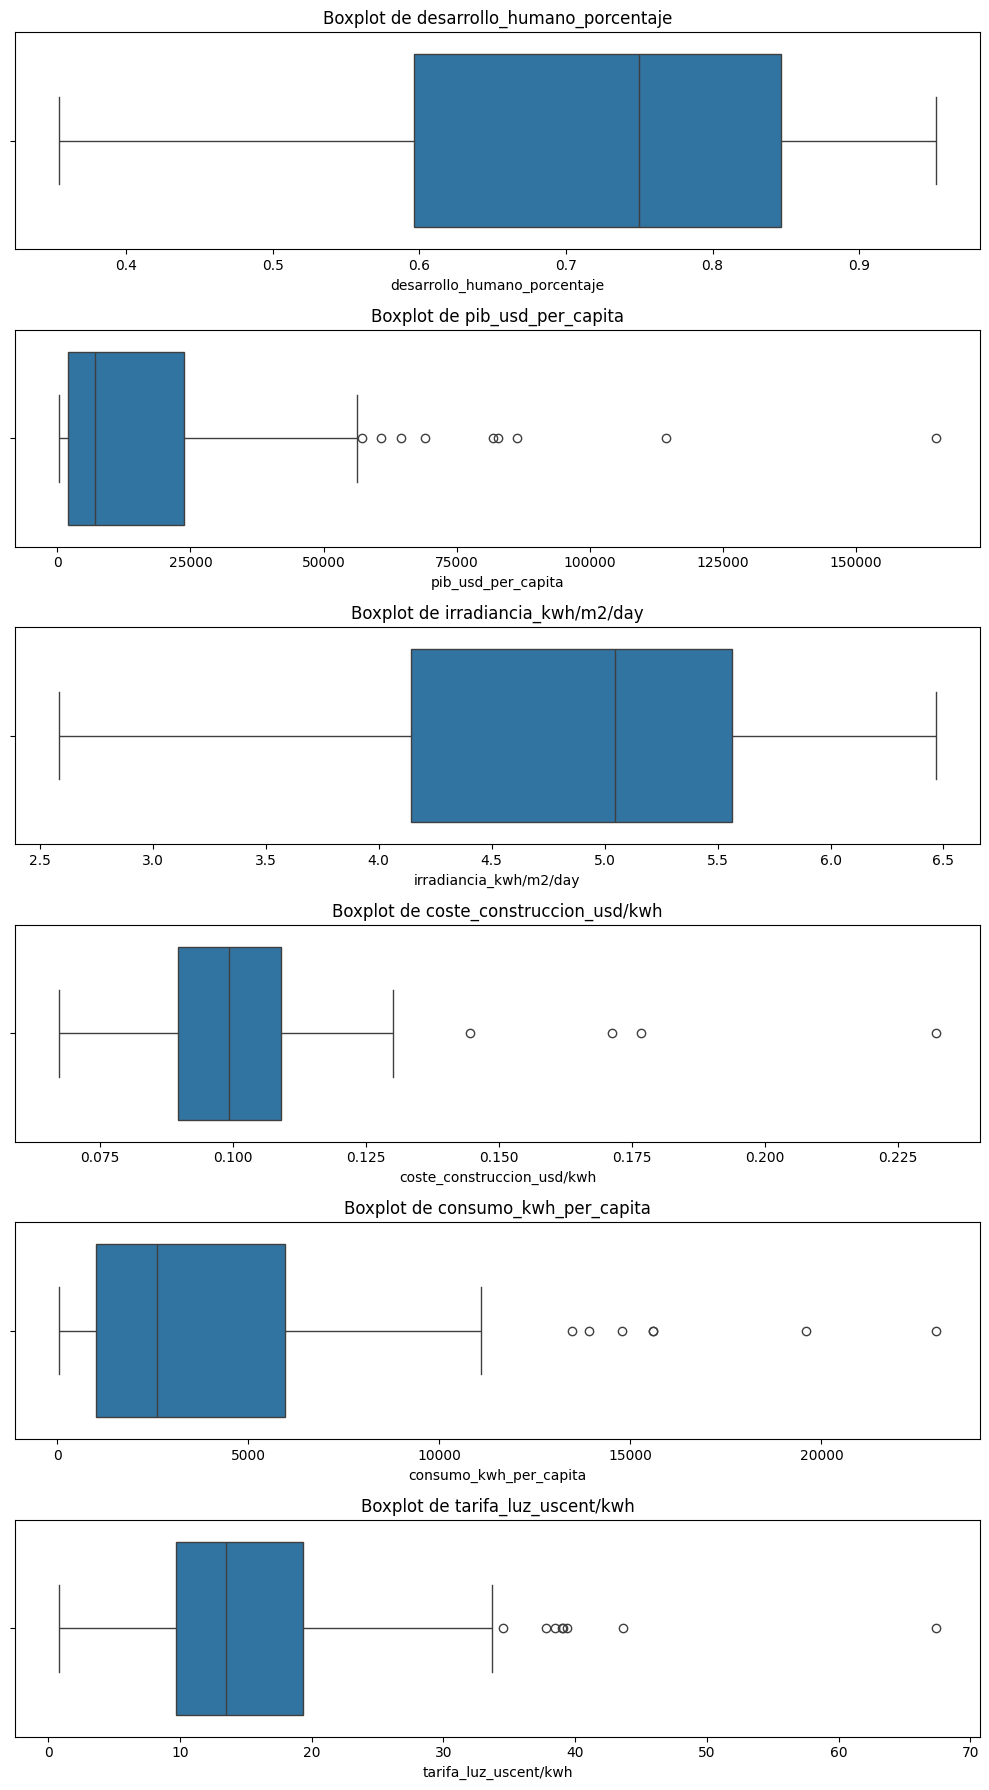

In [285]:
plt.figure(figsize=(10, len(X_train.columns) * 3))

for i, column in enumerate(X_train.columns):
    plt.subplot(len(X_train.columns), 1, i + 1)  # Subplot dinámico
    sns.boxplot(x=X_train[column])
    plt.title(f"Boxplot de {column}")
    plt.xlabel(column)
    plt.tight_layout()

plt.show()

In [286]:
def plot_histo_dens(df, columns, bins=None):
    num_cols = len(columns)
    num_rows = num_cols // 2 + num_cols % 2
    fig, axes = plt.subplots(num_rows, 2, figsize=(12, 6 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if df[column].dtype in ['int64', 'float64']:
            if bins:
                sns.histplot(df[column], kde=True, ax=axes[i], bins=bins)
            else:
                sns.histplot(df[column], kde=True, ax=axes[i])
            axes[i].set_title(f'Histograma y KDE de {column}')

    # Ocultar ejes vacíos
    for j in range(i + 1, num_rows * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

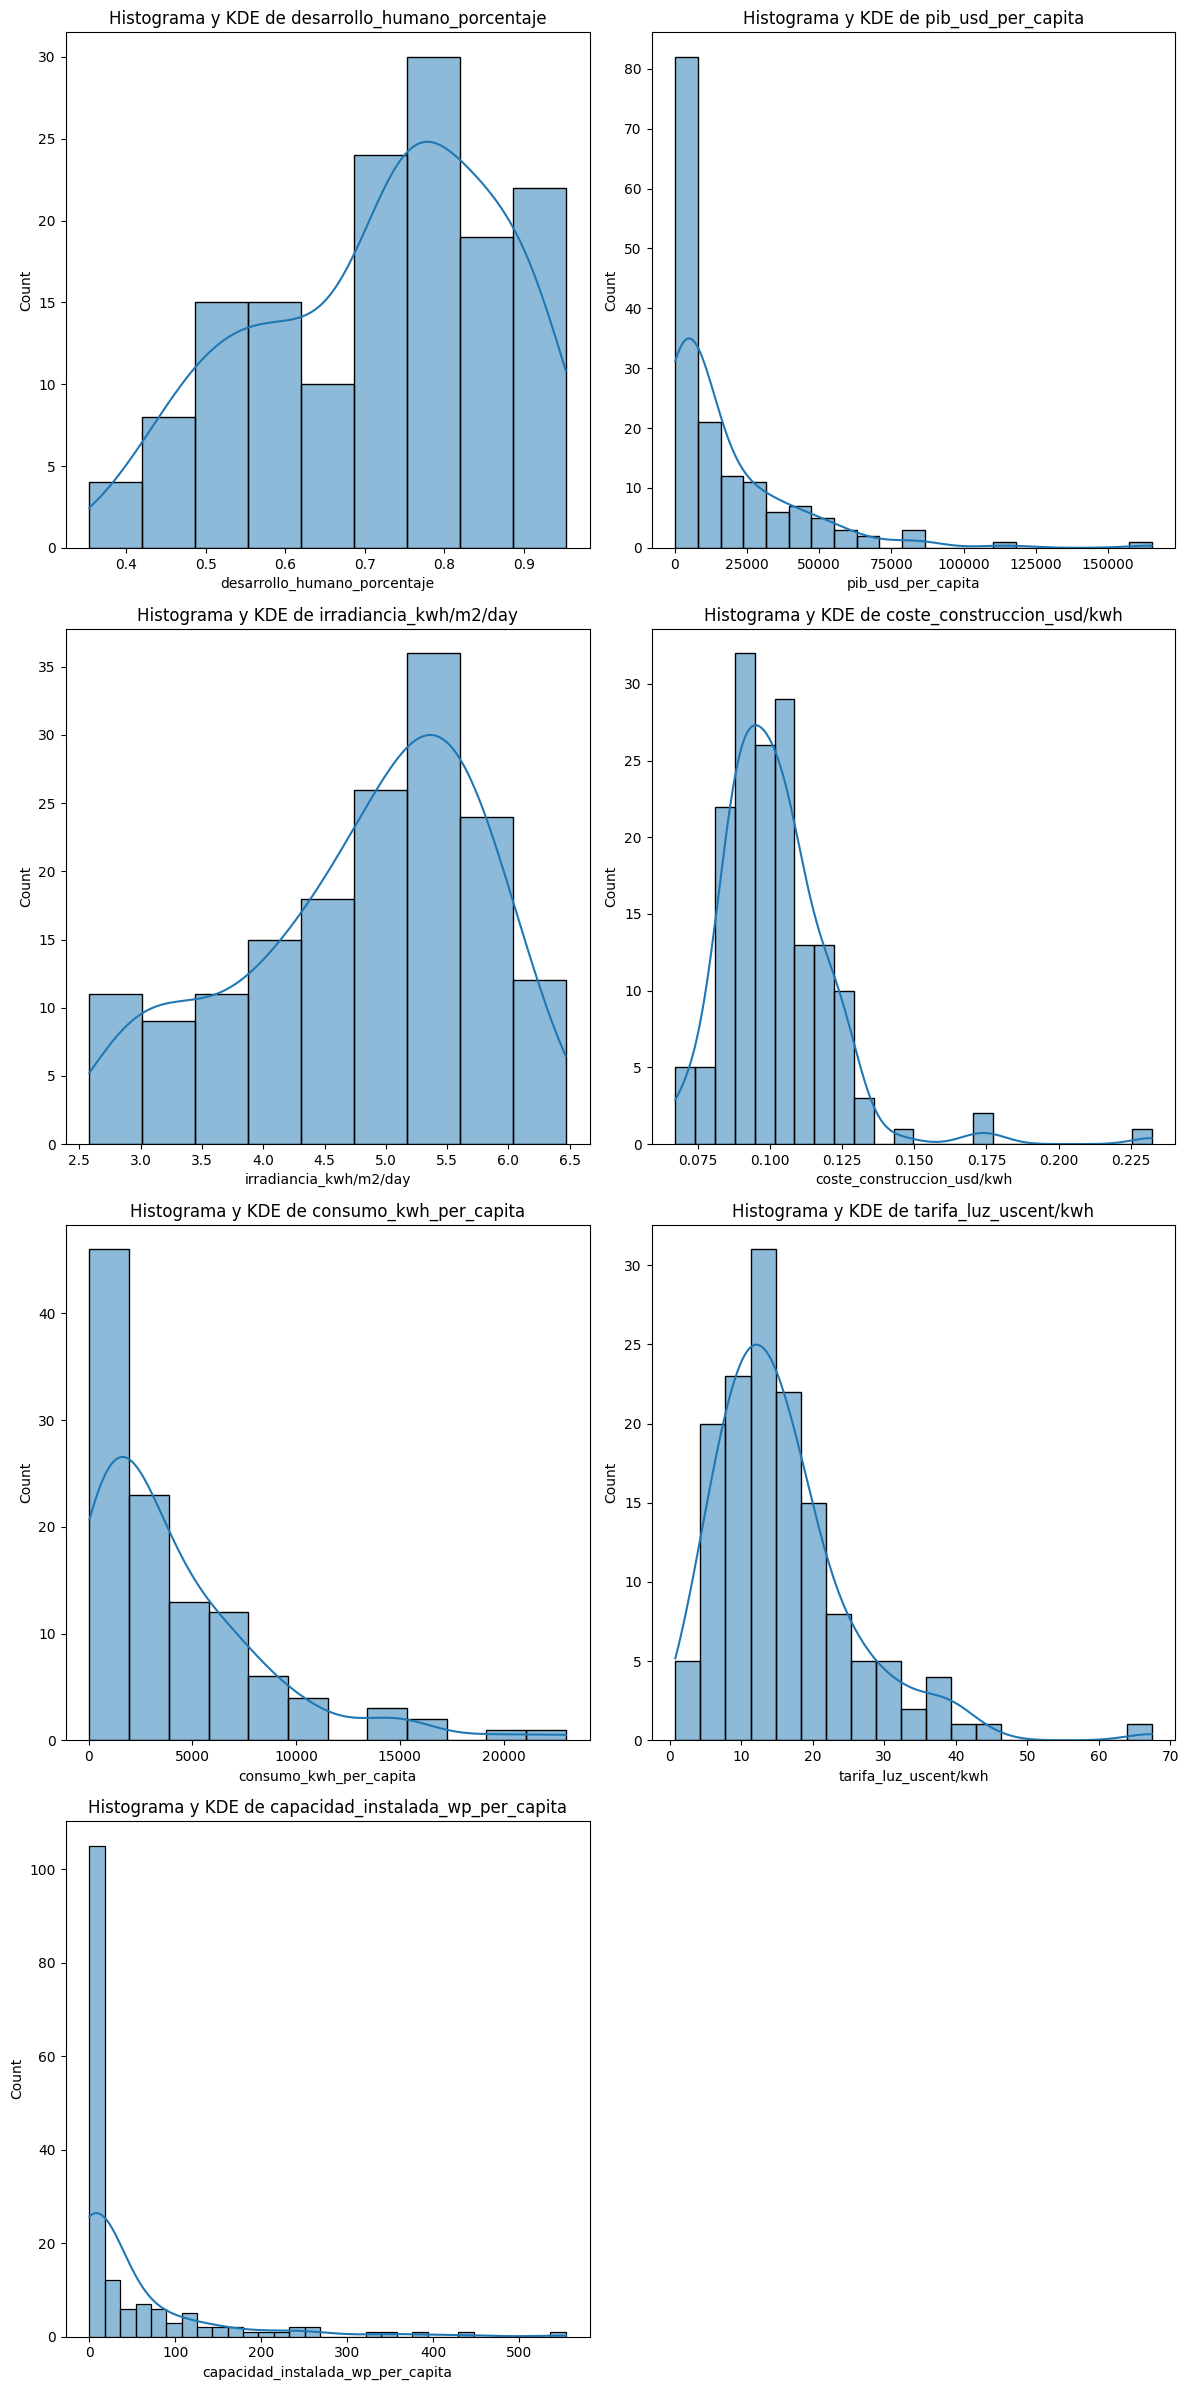

In [287]:
#Vemos todos los histogramas de df_eu_final
plot_histo_dens(train_set, train_set.columns)

In [288]:
#Vemos que tenemos desbalanceado el target. 

1 variable - Tratar las variables numericas como si fueran categoricas

In [289]:
#Función para Graficas de distribución categoricas 
def pinta_distribucion_categoricas(df, columnas_categoricas, relativa=False, mostrar_valores=False):
    num_columnas = len(columnas_categoricas)
    num_filas = (num_columnas // 2) + (num_columnas % 2)

    fig, axes = plt.subplots(num_filas, 2, figsize=(15, 5 * num_filas))
    axes = axes.flatten() 

    for i, col in enumerate(columnas_categoricas):
        ax = axes[i]
        if relativa:
            total = df[col].value_counts().sum()
            serie = df[col].value_counts().apply(lambda x: x / total)
            sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis', hue = serie.index, legend = False)
            ax.set_ylabel('Frecuencia Relativa')
        else:
            serie = df[col].value_counts()
            sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis', hue = serie.index, legend = False)
            ax.set_ylabel('Frecuencia')

        ax.set_title(f'Distribución de {col}')
        ax.set_xlabel('')
        ax.tick_params(axis='x', rotation=45)

        if mostrar_valores:
            for p in ax.patches:
                height = p.get_height()
                ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), 
                            ha='center', va='center', xytext=(0, 9), textcoords='offset points')

    for j in range(i + 1, num_filas * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()


Matriz de correlación

C:\Users\gema.sanz\AppData\Local\Temp\ipykernel_5472\3293889397.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  filtro_correlacion = matriz_correlacion.applymap(lambda x: x if abs(x) > porcentaje else np.nan)


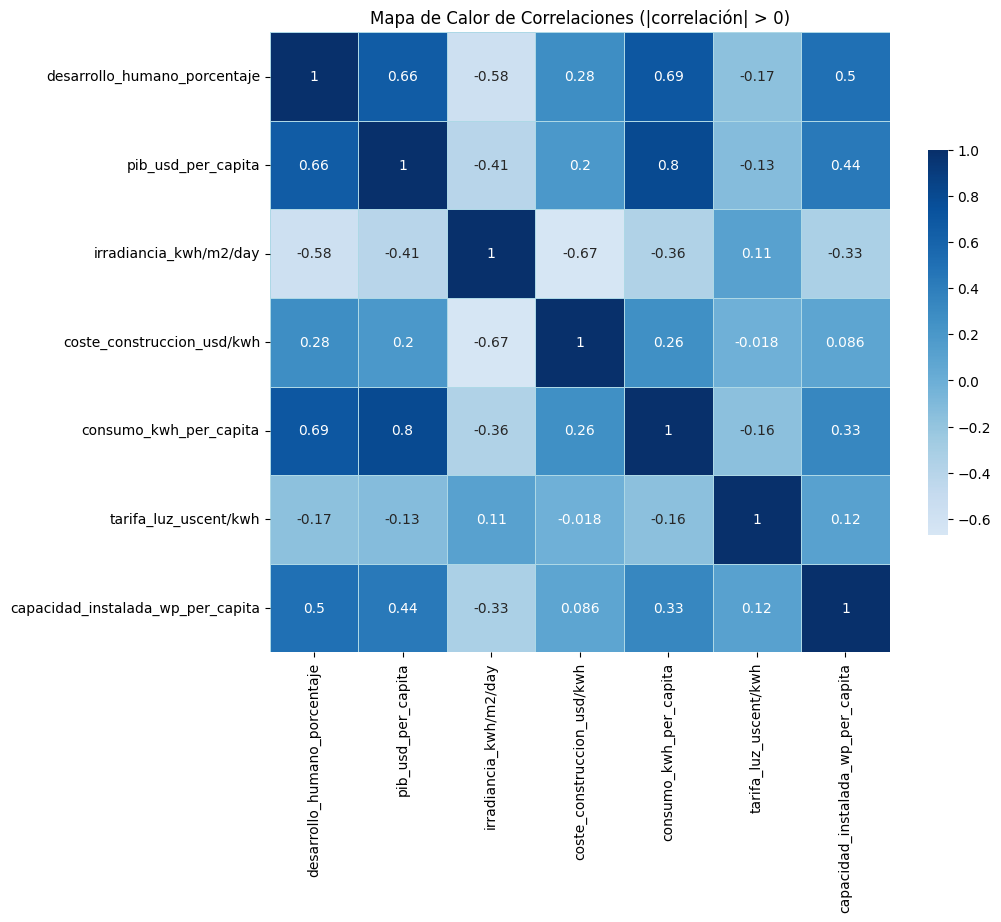

In [290]:
#Ver matriz de correlaciones solo valores más representativos
def mapa_calor_correlacion( df,porcentaje):
    # Supongamos que df_eu es tu DataFrame y ya has calculado la matriz de correlación
    matriz_correlacion = df.corr()

    # Filtrar la matriz de correlación para dejar solo valores superiores a 0.5 o inferiores a -0.5
    filtro_correlacion = matriz_correlacion.applymap(lambda x: x if abs(x) > porcentaje else np.nan)

    # Crear el mapa de calor
    plt.figure(figsize=(10, 10))
    sns.heatmap(filtro_correlacion,
                square=True, 
                annot=True, 
                cmap='Blues', 
                center=0,
                cbar_kws={'shrink': .5},
                linewidths=.5,
                linecolor='lightblue')

    plt.title(f'Mapa de Calor de Correlaciones (|correlación| > {porcentaje})')
    return plt.show()


mapa_calor_correlacion(train_set,0)
#Esta imagen, ira a la presentación

3 variables - Gráficos de dispersion

In [291]:
#Funcion para grafico de dispersión con 3 variables y todos los parametros
def dispersion_3_var(df,x1, z1):
    num_graphs = len(df.columns)
    for y1 in df.columns:
        plt.figure()  # Crea una nueva figura
        sns.scatterplot(x=x1,
                        y=y1,
                        size=df[z1],
                        hue=df[z1],
                        palette= "Blues",
                        data=df,
                        edgecolor='grey',
                        legend=False)  # Esto quita la leyenda)
    # Mostrar todas las gráficas
    return plt.show()

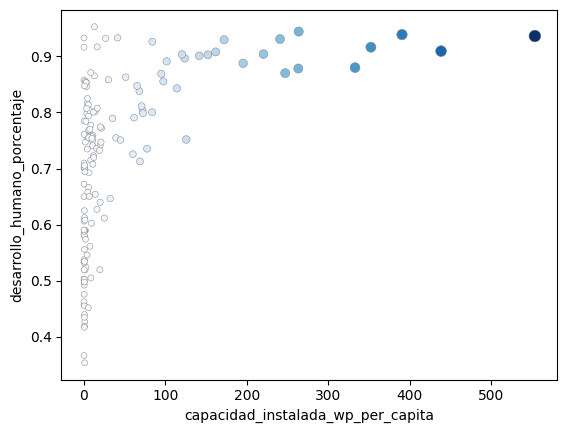

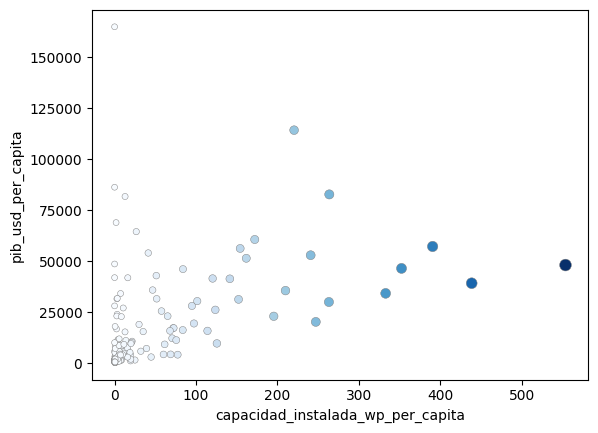

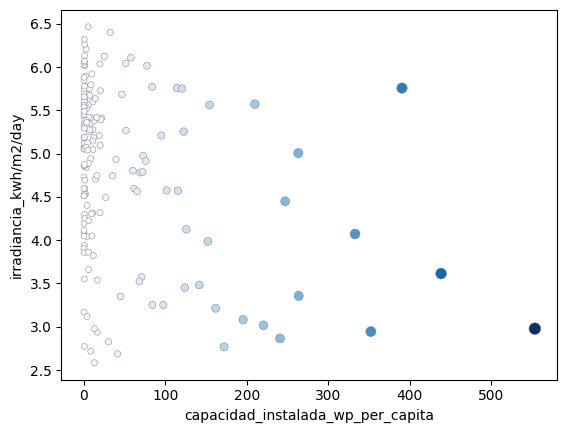

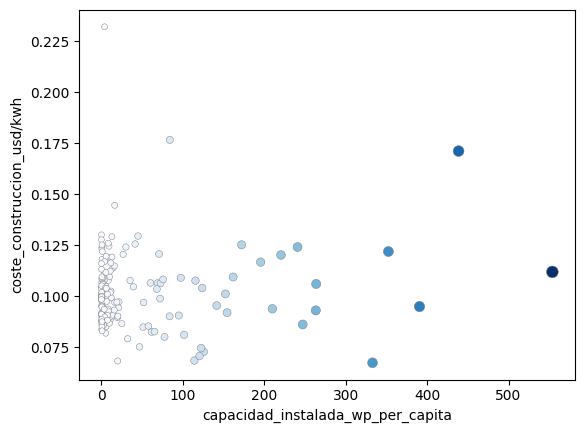

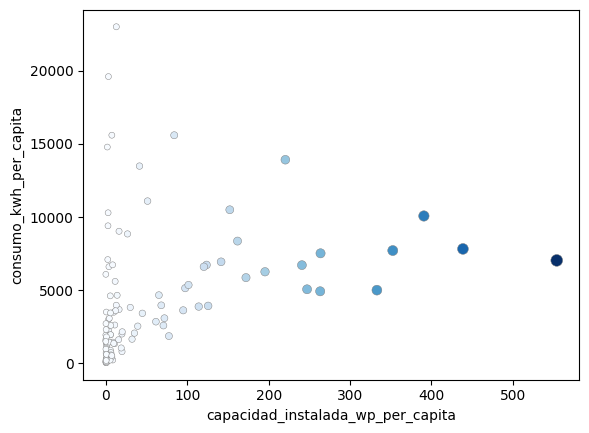

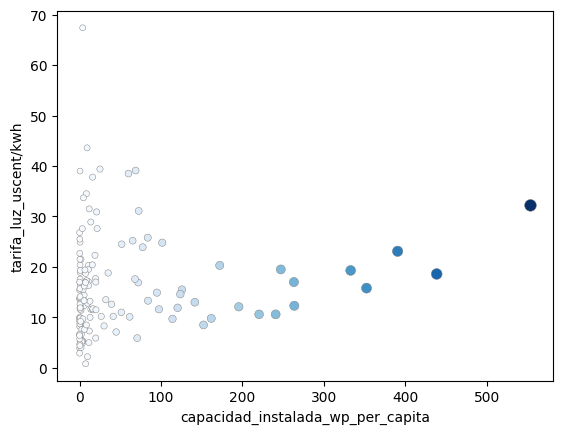

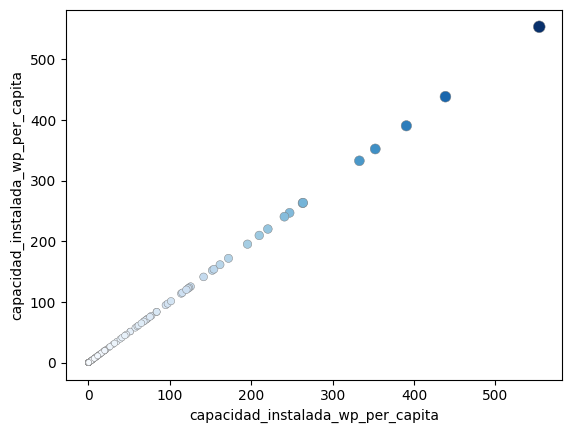

In [292]:
#VARIABLE CAPACIDAD INSTALADA COMO PRINCIPAL
dispersion_3_var(train_set,"capacidad_instalada_wp_per_capita","capacidad_instalada_wp_per_capita")

4 variables - Gráfico de dispersión

In [293]:
#Función grafico dispersión de 4 variables
def dispersion_4_var(df,x1,z1,w1):
    num_graphs = len(df.columns)
    for y1 in df.columns:
        plt.figure()  # Crea una nueva figura
        sns.scatterplot(x=x1,
                        y=y1,
                        size=df[z1],
                        hue=df[w1],
                        palette= "Blues",
                        data=df,
                        edgecolor='grey',
                        legend=False)  # Esto quita la leyenda)
    # Mostrar todas las gráficas
    return plt.show()

In [294]:
train_set.describe()

desarrollo_humano_porcentaje  pib_usd_per_capita  \
count                    147.000000          154.000000   
mean                       0.718591        17206.239445   
std                        0.151005        23750.591890   
min                        0.353931          275.429603   
25%                        0.596567         2074.402645   
50%                        0.749773         7133.368934   
75%                        0.846611        23842.850750   
max                        0.952522       165028.245029   

       irradiancia_kwh/m2/day  coste_construccion_usd/kwh  \
count              162.000000                  162.000000   
mean                 4.808498                    0.101836   
std                  0.970068                    0.019429   
min                  2.583300                    0.067300   
25%                  4.143725                    0.089800   
50%                  5.045300                    0.099300   
75%                  5.562750                    0.109150   
max                  6.467500                    0.232200   

       consumo_kwh_per_capita  tarifa_luz_uscent/kwh  \
count              111.000000             143.000000   
mean              4093.471243              15.775524   
std               4355.121896               9.710791   
min                 39.055805               0.800000   
25%               1012.525022               9.700000   
50%               2619.960616              13.500000   
75%               5971.035736              19.350000   
max              22999.934595              67.400000   

       capacidad_instalada_wp_per_capita  
count                         162.000000  
mean                           45.759558  
std                            88.632067  
min                             0.000000  
25%                             0.645328  
50%                             7.380572  
75%                            50.115507  
max                           553.854467

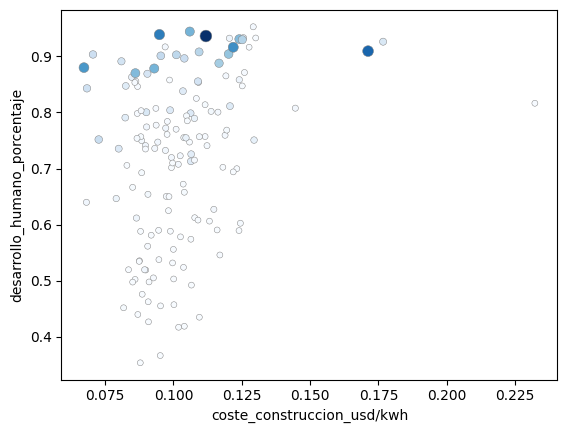

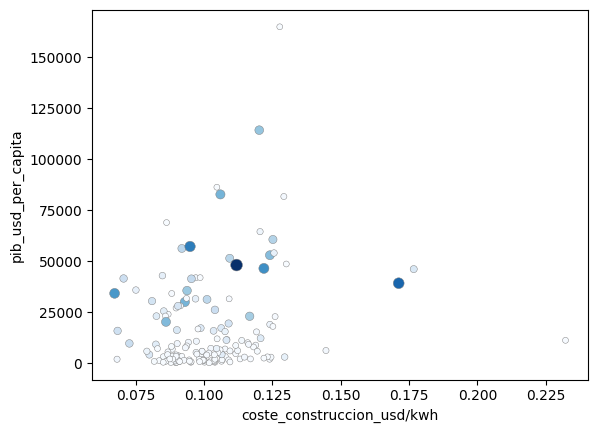

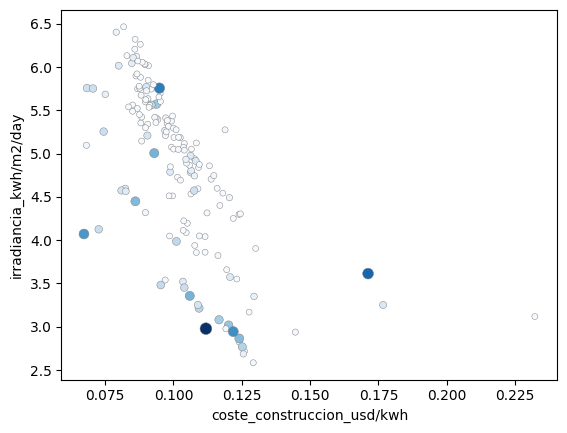

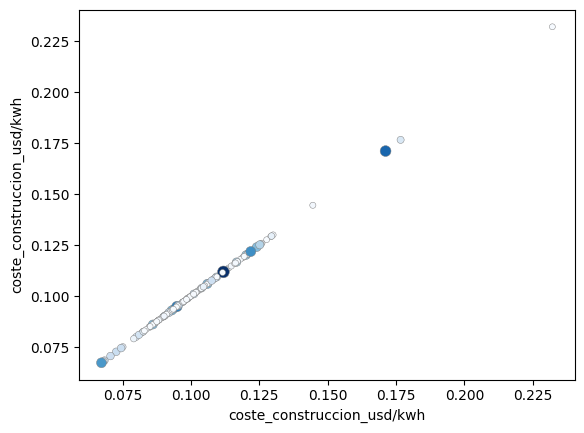

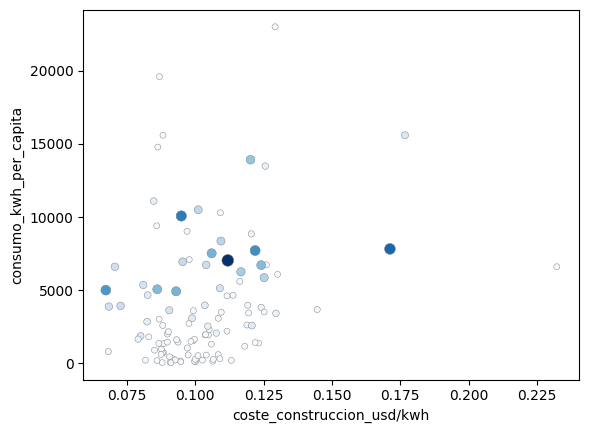

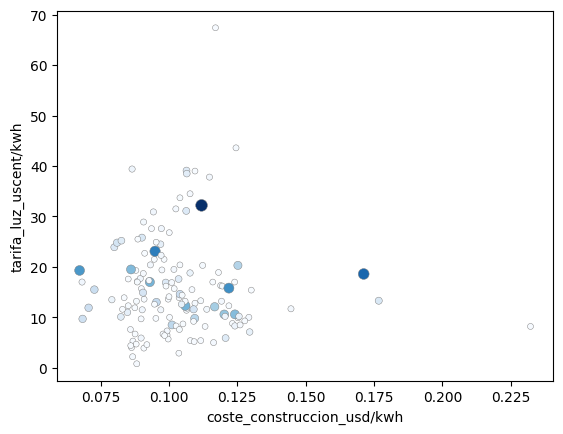

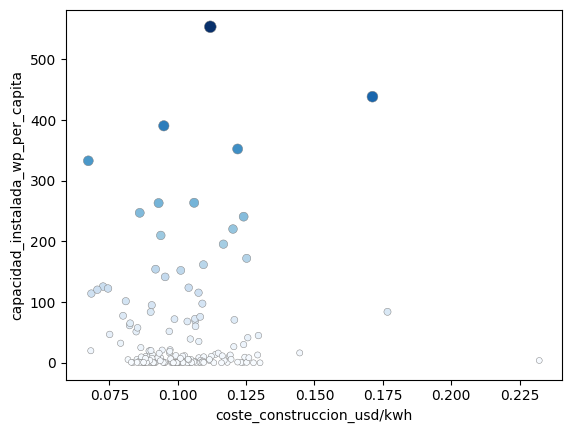

In [295]:
dispersion_4_var(train_set,'coste_construccion_usd/kwh', 'capacidad_instalada_wp_per_capita', 'capacidad_instalada_wp_per_capita' )

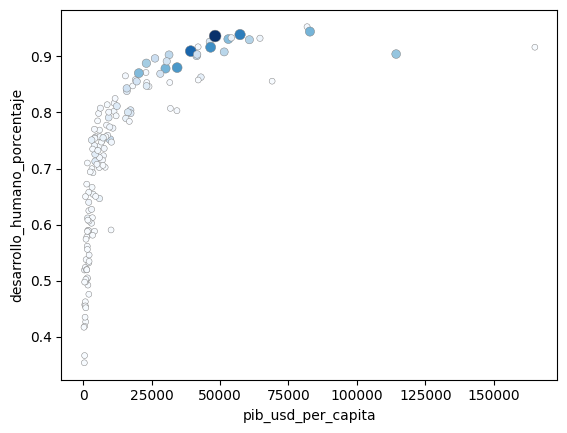

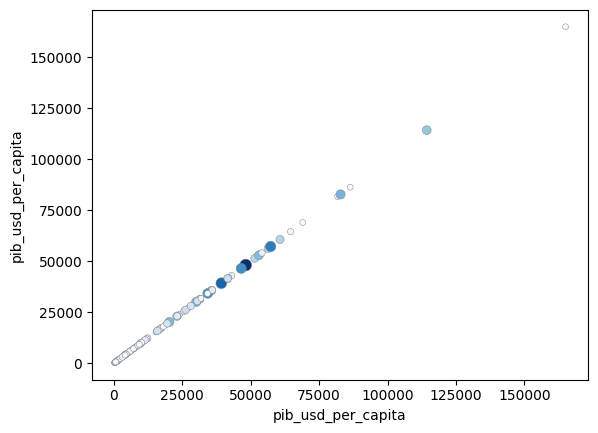

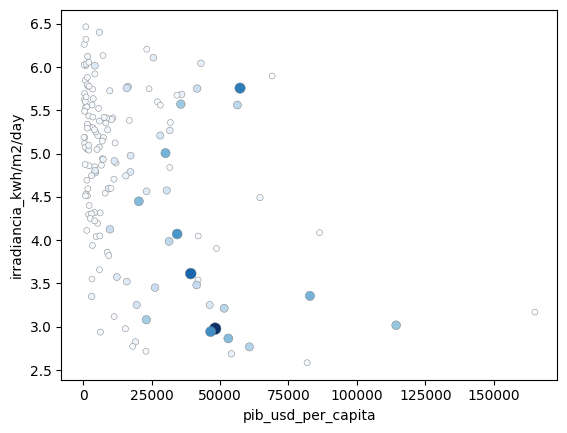

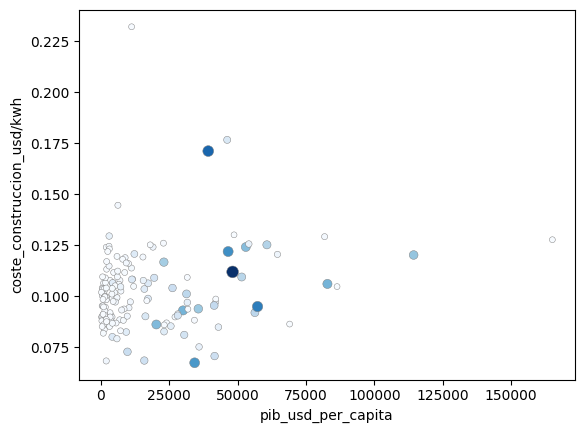

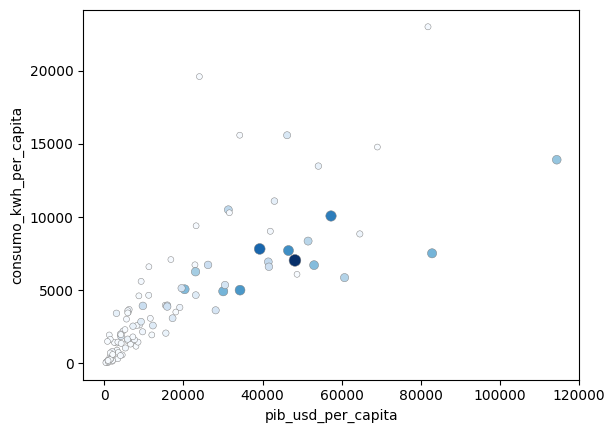

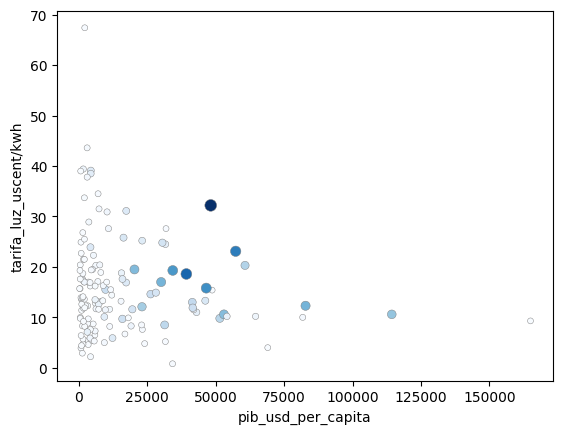

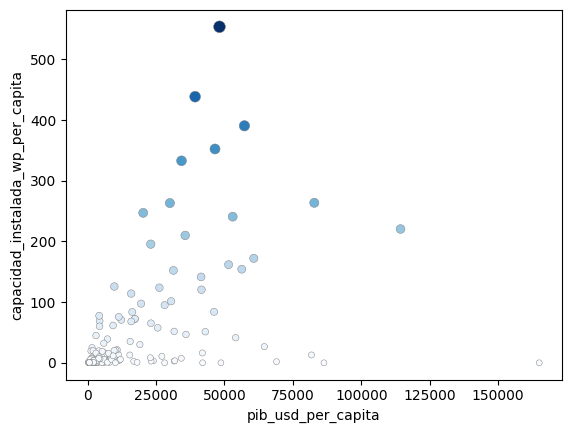

In [296]:
dispersion_4_var(train_set,'pib_usd_per_capita', 'capacidad_instalada_wp_per_capita', 'capacidad_instalada_wp_per_capita' )

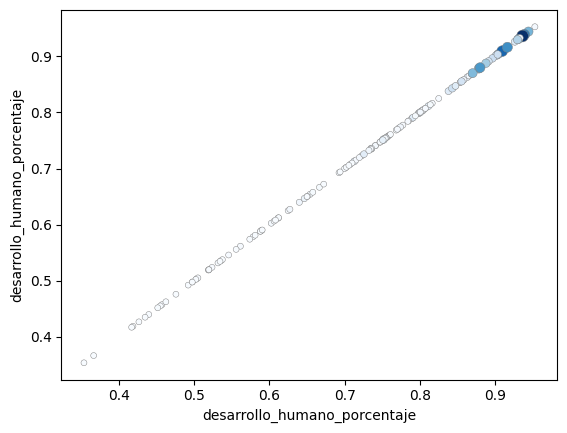

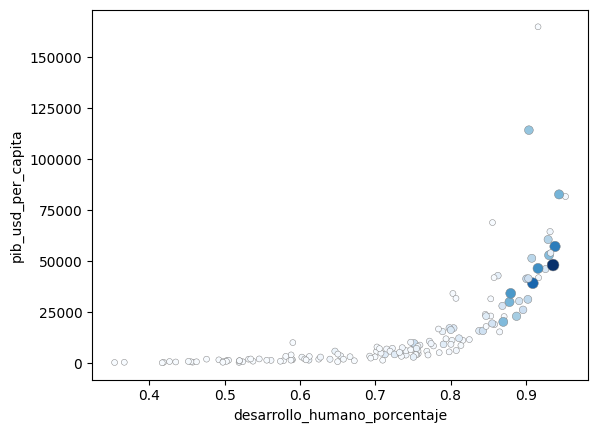

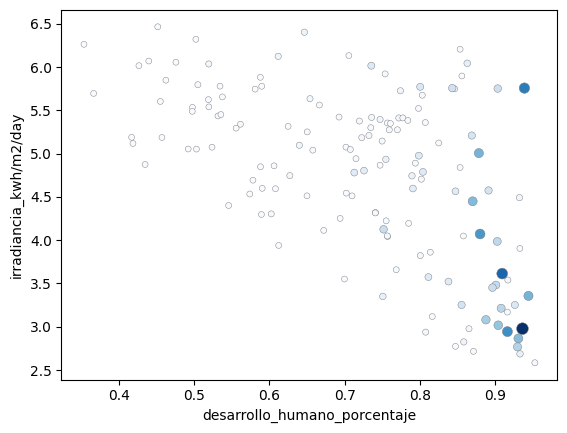

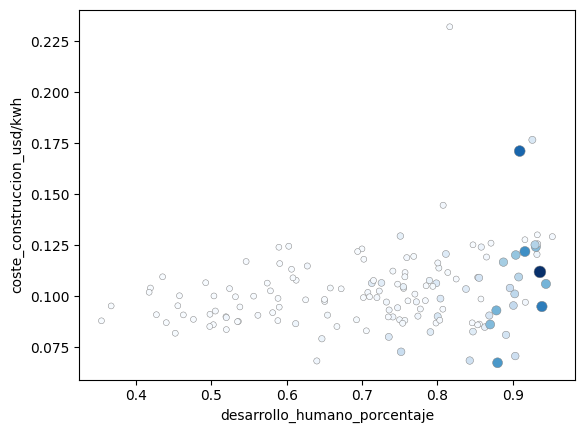

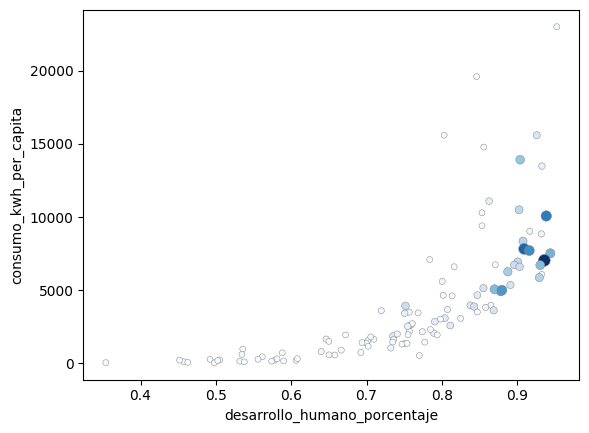

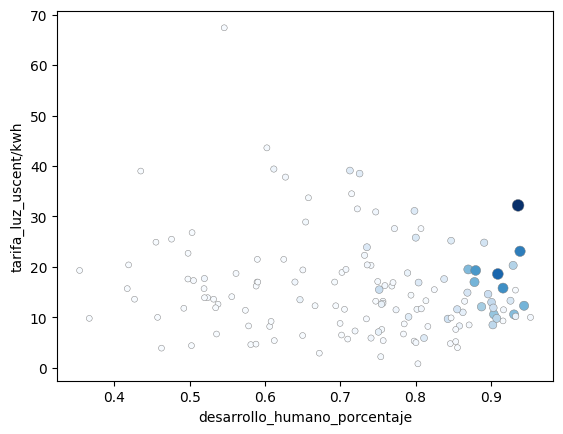

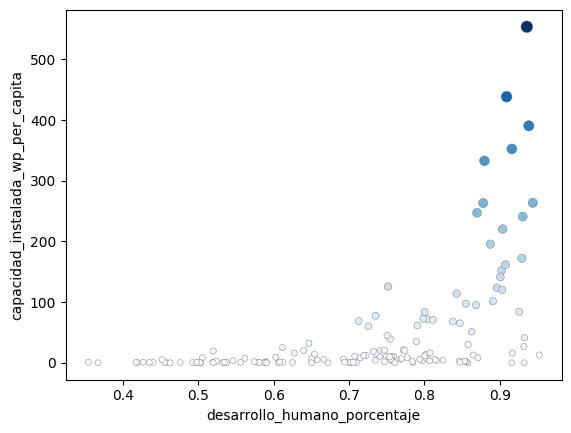

In [297]:
dispersion_4_var(train_set,'desarrollo_humano_porcentaje', 'capacidad_instalada_wp_per_capita', 'capacidad_instalada_wp_per_capita' )

## 7. CONCLUSIÓN ANALISIS


La hipótesis inicial era la inversión en plantas solares debido a la alta irradiancia. Está hipótesis, es “falsa” a medias. 
Porque, además de la irradiancia depende de otros parámetros.

Parece que el parámetro más claro es el del desarrollo humano. Si tuvieramos un missing no podriamos calcular el modelo?
Separar en dos modelos: desarrollo <> 0.85. (Según estudio mini EDA)

Comprobación de separación de dos modelos con Kmeans.

Es importante separar el modelo en dos porque tenemos los datos desbalanceados.


## 8. ESTUDIO MACHINE LEARNING - CATBOOST NUMERICO

1. Rellenar missing - knn + Escalado MinMax.
2. CatBoost
3. Predición numérica.

In [298]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, make_scorer
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from catboost import CatBoostRegressor
import xgboost as xgb
import pandas as pd

In [299]:
def dispersion_pred_real(y_train, y_pred, color_dim=None):
    """
    Grafica la relación entre valores reales y predicciones, con una dimensión adicional representada por el color.

    Parámetros:
    - y_train: Valores reales (array-like)
    - y_pred: Predicciones del modelo (array-like)
    - color_dim: Dimensión adicional para el color (array-like, opcional)
    """

    # Verificar que las dimensiones de y_train y y_pred sean compatibles
    if len(y_train) != len(y_pred):
        raise ValueError("Las longitudes de y_train y y_pred deben ser iguales.")
    
    # Si no se proporciona color_dim, no utilizar colores adicionales
    if color_dim is not None and len(color_dim) != len(y_train):
        raise ValueError("La longitud de color_dim debe ser igual a la de y_train y y_pred.")


    #gRAFICO dispersión de puntos 
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(
        x= y_train, 
        y = y_pred, 
        c=color_dim,  
        cmap='viridis',  
        alpha=0.8, 
        edgecolor='k'
    )
    #Linea de referencia train - train
    plt.plot(
        [y_train.min(), y_train.max()], 
        [y_train.min(), y_train.max()], 
        color='red', 
        linestyle='--', 
        linewidth=1.5
    )  # Línea de referencia
    plt.title('Predicciones vs Valores Reales (Color: Cluster)')
    plt.xlabel('Valores Reales (y_train)')
    plt.ylabel('Predicciones (y_pred)')
    plt.colorbar(scatter, label='Color :Clusters')  # Barra de colores
    plt.grid(True)
    plt.show()

In [300]:
X_train.columns

Index(['desarrollo_humano_porcentaje', 'pib_usd_per_capita',
       'irradiancia_kwh/m2/day', 'coste_construccion_usd/kwh',
       'consumo_kwh_per_capita', 'tarifa_luz_uscent/kwh'],
      dtype='object')

In [301]:

# Pipeline 1: Imputación y Escalado
pipeline_numeric = Pipeline([
    ('imputer', KNNImputer(n_neighbors=5)),
    ('scaler', MinMaxScaler())              
])


#Editar X_train, para las features seleccionadas
featur = [ 'desarrollo_humano_porcentaje','pib_usd_per_capita',
       'irradiancia_kwh/m2/day', 'coste_construccion_usd/kwh']
X_train_cat = X_train.copy()
X_test_cat = X_test.copy()

X_train_cat = X_train_cat[featur]
X_test_cat = X_test_cat[featur]

#TRAIN
# Aplicar el primer pipeline (preprocesamiento)
X_train_3 = pipeline_numeric.fit_transform(X_train_cat)
X_train_3_df = pd.DataFrame(X_train_3, columns=X_train_cat.columns, index=X_train_cat.index)


#TEST
#Comprobar con X test
#Transformamos los datos como el Train 
X_test_3= pipeline_numeric.transform(X_test_cat)
X_test_3_df = pd.DataFrame(X_test_3, columns=X_test_cat.columns, index=X_test_cat.index)



8.3.3 MODELADO

In [302]:

modelo = CatBoostRegressor(silent=True, random_state=42)

# Definir el espacio de búsqueda de los hiperparámetros
param_grid = {
    'iterations': [100],  # Número de iteraciones
    'learning_rate': [0.1],  # Tasa de aprendizaje
    'depth': [6],  # Profundidad de los árboles
}


# Definir una métrica para la evaluación (RMSE)
scorer = make_scorer(mean_absolute_error, greater_is_better=True, squared=False)

# Configuración de GridSearchCV
grid_search = GridSearchCV(estimator=modelo, 
                           param_grid=param_grid, 
                           scoring=scorer,  # Usar RMSE como métrica
                           cv=3,  # Número de particiones en la validación cruzada
                           verbose=1,  # Mostrar información durante la búsqueda
                           n_jobs=-1)  # Usar todos los núcleos disponibles para acelerar

# Ajustar el GridSearchCV
grid_search.fit(X_train_3_df, y_train)

# Obtener los mejores parámetros encontrados
print(f"Mejores parámetros: {grid_search.best_params_}")

# Obtener el mejor modelo
best_model = grid_search.best_estimator_


# Predecir en el conjunto de prueba
y_pred_train = best_model.predict(X_train_3_df)
y_pred_test = best_model.predict(X_test_3_df)

# Calcular métricas
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
    
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

resultados = {"rmse train":rmse_train,
              "mae train": mae_train,
              "r2 train": r2_train,
              "rmse test":rmse_test,
              "mae test": mae_test,
              "r2 test": r2_test}

df_resultados = pd.DataFrame(list(resultados.items()), columns= ["Metrica_train", "Valor_train"])
df_resultados

Fitting 3 folds for each of 1 candidates, totalling 3 fits


c:\Users\gema.sanz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:1102: UserWarning: One or more of the test scores are non-finite: [nan]
  warnings.warn(


Mejores parámetros: {'depth': 6, 'iterations': 100, 'learning_rate': 0.1}


c:\Users\gema.sanz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\gema.sanz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Metrica_train  Valor_train
0    rmse train    22.451101
1     mae train    14.940048
2      r2 train     0.935437
3     rmse test    31.437250
4      mae test    19.192088
5       r2 test     0.542534

C:\Users\gema.sanz\AppData\Local\Temp\ipykernel_5472\4211269936.py:22: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = plt.scatter(


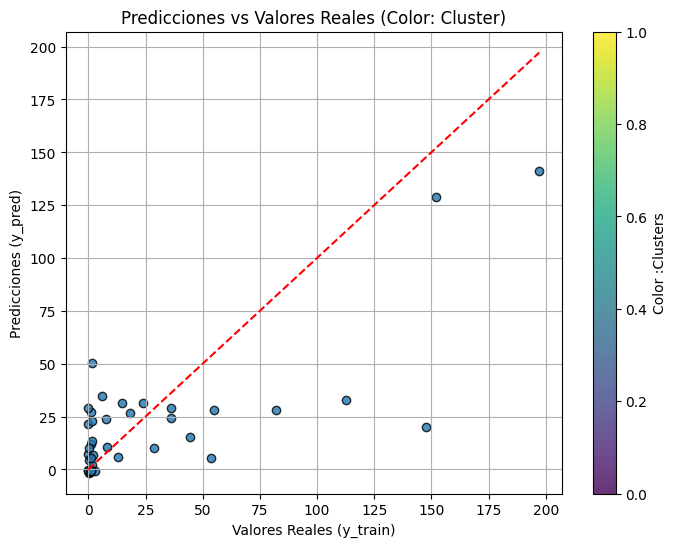

In [303]:
dispersion_pred_real(y_test, y_pred_test )
    #NO hay diferencia entre usar el cluster o no.

# 9. ESTUDIO MODELO - CATEGORICO

In [304]:
#Primero sacamos clasificación del target:
#Merece la pena invertir en el pais o no
y_train
y_train_df = pd.DataFrame(y_train)
y_train_df.head(2)

#Queremos conocer los paises que están por encima del percentil 75% de 50 a 553 wp per capita
cond = y_train_df["capacidad_instalada_wp_per_capita"] > 50

# Asignar 1 a 'inversion' si el valor cumple la condición, sino 0
y_train_df['inversion'] = cond.astype(int)
y_train_df.head(2)

y_train_df.drop(columns = "capacidad_instalada_wp_per_capita", inplace= True)


In [305]:
#Tratamos y_test
y_test_df = pd.DataFrame(y_test)
cond = y_test_df["capacidad_instalada_wp_per_capita"] > 50

# Asignar 1 a 'inversion' si el valor cumple la condición, sino 0
y_test_df['inversion'] = cond.astype(int)

y_test_df.drop(columns = "capacidad_instalada_wp_per_capita", inplace= True)

In [306]:
X_train.columns

Index(['desarrollo_humano_porcentaje', 'pib_usd_per_capita',
       'irradiancia_kwh/m2/day', 'coste_construccion_usd/kwh',
       'consumo_kwh_per_capita', 'tarifa_luz_uscent/kwh'],
      dtype='object')

In [307]:
# Pipeline 1: Imputación y Escalado
pipeline_numeric = Pipeline([
    ('imputer', KNNImputer(n_neighbors=5)),
    # ('imputer', SimpleImputer(strategy='mean')),  # Missings con la media
    # ('scaler', MinMaxScaler())                  # Normalización
])

#Editar X_train, para las features seleccionadas
featur = ['desarrollo_humano_porcentaje', 'pib_usd_per_capita',
       'irradiancia_kwh/m2/day']
X_train_mean = X_train.copy()
X_test_mean = X_test.copy()

X_train_mean = X_train_mean[featur]
X_test_mean = X_test_mean[featur]


#TRAIN

# Aplicar el primer pipeline (preprocesamiento)
X_train_1 = pipeline_numeric.fit_transform(X_train_mean)
X_train_1_df = pd.DataFrame(X_train_1, columns=X_train_mean.columns, index=X_train_mean.index)


#TEST

#Comprobar con X test
#Transformamos los datos como el Train 
X_test_1= pipeline_numeric.transform(X_test_mean)
X_test_1_df = pd.DataFrame(X_test_1, columns=X_test_mean.columns, index=X_test_mean.index)

In [308]:
#UNDERSAMPLING POR QUE TENEMOS EL DATASET DESBALANCEADOS 
from imblearn.under_sampling import RandomUnderSampler


# Definir el Undersampling
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)

# Supongamos que y_train es la variable objetivo
# Aplica el undersampling en X_train_1 y y_train
X_train_1_resampled, y_train_resampled = undersampler.fit_resample(X_train_1_df, y_train_df)

# Convertir a DataFrame para mantener la estructura de datos
X_train_1_resampled_df = pd.DataFrame(X_train_1_resampled, columns=X_train_1_df.columns, index=X_train_1_df.index)
y_train_resampled_df = pd.DataFrame(y_train_resampled, index=X_train_1_df.index)
# Ahora X_train_1_resampled_df es tu conjunto de entrenamiento equilibrado


In [309]:
from sklearn.linear_model import LogisticRegression, SGDClassifier, RidgeClassifier, Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Diccionario con todos los modelos
modelos = {
    # "Regresión Logística": LogisticRegression(max_iter=1000, random_state=42),
    # "SGD Classifier": SGDClassifier(loss="log", random_state=42),
    "Ridge Classifier": RidgeClassifier(random_state=42),
    "Perceptrón": Perceptron(max_iter=1000, random_state=42),
    "KNN": KNeighborsClassifier(),
    # "Gaussian Naive Bayes": GaussianNB(),
    # "Multinomial Naive Bayes": MultinomialNB(),
    # "Bernoulli Naive Bayes": BernoulliNB(),
    "Árbol de Decisión": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    # # "Bagging": BaggingClassifier(random_state=42),
    # "Linear Discriminant Analysis": LinearDiscriminantAnalysis(),
    # "Quadratic Discriminant Analysis": QuadraticDiscriminantAnalysis(),
    # "SVM (Linear)": SVC(kernel="linear", probability=True, random_state=42),
    # "SVM (RBF)": SVC(kernel="rbf", probability=True, random_state=42),
    "MLP Classifier": MLPClassifier(max_iter=1000, random_state=42),
    # "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    "LightGBM": LGBMClassifier(random_state=42, verbose = -1),
    "CatBoost": CatBoostClassifier(silent=True, random_state=42)
}



# Evaluar cada modelo
resultados = []
predicciones = {}
for nombre, modelo in modelos.items():
    modelo.fit(X_train_1_resampled, y_train_resampled)
    y_pred = modelo.predict(X_test_1_df)
    acc = accuracy_score(y_test_df, y_pred)
    resultados.append((nombre, acc))
    predicciones[nombre] = y_pred

# # Ordenar y mostrar resultados
# df_resultados = pd.DataFrame(resultados, columns=["Modelo", "Métrica"])
df_predicciones = pd.DataFrame(predicciones)

# df_resultados.sort_values(by= "Métrica", ascending = False)

c:\Users\gema.sanz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:1303: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\gema.sanz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\gema.sanz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\gema.sanz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473:

In [310]:
from sklearn.metrics import classification_report

for modelo in df_predicciones.columns:
    print (modelo)
    print(classification_report(y_test_df, df_predicciones[modelo]))
    print("\n")

Ridge Classifier
              precision    recall  f1-score   support

           0       0.88      0.85      0.87        34
           1       0.38      0.43      0.40         7

    accuracy                           0.78        41
   macro avg       0.63      0.64      0.63        41
weighted avg       0.79      0.78      0.79        41



Perceptrón
              precision    recall  f1-score   support

           0       0.83      1.00      0.91        34
           1       0.00      0.00      0.00         7

    accuracy                           0.83        41
   macro avg       0.41      0.50      0.45        41
weighted avg       0.69      0.83      0.75        41



KNN
              precision    recall  f1-score   support

           0       0.92      0.71      0.80        34
           1       0.33      0.71      0.45         7

    accuracy                           0.71        41
   macro avg       0.63      0.71      0.63        41
weighted avg       0.82      0.71     

c:\Users\gema.sanz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\gema.sanz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\gema.sanz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

In [311]:
#NOS INTERESA TENER UN RECALL ALTO DE 1 (SI INVERTIR) porque queremos tener en cuenta todas las opciones de inversión.
#NOS QUEDAMOS CON ADABOOST

In [312]:
from sklearn.linear_model import LogisticRegression, SGDClassifier, RidgeClassifier, Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Diccionario con todos los modelos
modelos = {
    "AdaBoost": AdaBoostClassifier(random_state=42),

}



# Evaluar cada modelo
resultados = []
predicciones = {}
for nombre, modelo in modelos.items():
    modelo.fit(X_train_1_resampled, y_train_resampled)
    y_pred = modelo.predict(X_test_1_df)
    acc = accuracy_score(y_test_df, y_pred)
    resultados.append((nombre, acc))
    predicciones[nombre] = y_pred

# # Ordenar y mostrar resultados
# df_resultados = pd.DataFrame(resultados, columns=["Modelo", "Métrica"])
df_predicciones = pd.DataFrame(predicciones)

# df_resultados.sort_values(by= "Métrica", ascending = False)

c:\Users\gema.sanz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\gema.sanz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [313]:



from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

# Pipeline 2: AdaBoost
pipeline_cluster = Pipeline([
    # ('pca', PCA()),               # Si quisieras usar PCA en el pipeline, descomenta esta línea
    # ('kmeans', KMeans(random_state=42)),  # Descomentar si quieres usar KMeans
    ('adaboost', AdaBoostClassifier())  # AdaBoost Classifier
])

# Definir el espacio de búsqueda de hiperparámetros para AdaBoost
param_grid_cluster = {
    'adaboost__n_estimators': [50, 100, 200],  # Número de estimadores (árboles débiles)
    'adaboost__learning_rate': [0.01, 0.1, 1.0],  # Tasa de aprendizaje
    'adaboost__algorithm': ['SAMME', 'SAMME.R'],
    'adaboost__random_state': [42]  # Algoritmo de AdaBoost, SAMME es más preciso, SAMME.R es más rápido
}

# Definir GridSearchCV
grid_search = GridSearchCV(pipeline_cluster, param_grid_cluster, cv=5)

# Entrenar GridSearchCV aplicado al pipeline
grid_search.fit(X_train_1_resampled, y_train_resampled)

# Parametros y métricas
print("Mejores parámetros:", grid_search.best_params_)
print("Mejor score de validación:", grid_search.best_score_, "\n")

# Elegir el mejor modelo
best_pipeline = grid_search.best_estimator_

# Métricas de la validación cruzada con el mejor pipeline
scores = cross_val_score(best_pipeline, X_train_1_resampled, y_train_resampled, cv=5)
print("Puntajes de validación cruzada:", scores)
print("Puntaje promedio de validación cruzada:", scores.mean(), "\n")  # Corregido el acceso a .mean()

# Predecir las etiquetas aplicando el pipeline en entrenamiento
y_pred_train = best_pipeline.predict(X_train_1_resampled)
X_train_1_cluster = X_train_1_resampled.copy()  # Corregido el uso de X_train_1_resampled_df
X_train_1_cluster['Cluster'] = y_pred_train

# Predecir en test (esto es lo que corregimos)
y_pred_test = best_pipeline.predict(X_test_1_df)  # Ahora y_pred_test está correctamente definido
X_test_1_cluster = X_test_1_df.copy()  # Corregido el uso de X_test_1_df
X_test_1_cluster['Cluster'] = y_pred_test

# También puedes obtener un reporte completo con precisión, recall, y F1-score
print(classification_report(y_test_df, y_pred_test))

c:\Users\gema.sanz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\gema.sanz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\gema.sanz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\gema.sanz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validatio

Mejores parámetros: {'adaboost__algorithm': 'SAMME.R', 'adaboost__learning_rate': 0.01, 'adaboost__n_estimators': 100, 'adaboost__random_state': 42}
Mejor score de validación: 0.7933823529411764 



c:\Users\gema.sanz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\gema.sanz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\gema.sanz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\gema.sanz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: 

Puntajes de validación cruzada: [0.64705882 0.88235294 0.8125     0.8125     0.8125    ]
Puntaje promedio de validación cruzada: 0.7933823529411764 

              precision    recall  f1-score   support

           0       0.90      0.82      0.86        34
           1       0.40      0.57      0.47         7

    accuracy                           0.78        41
   macro avg       0.65      0.70      0.67        41
weighted avg       0.82      0.78      0.79        41



In [314]:
test_set["Predicción"] = y_pred_test
test_set['Inversion'] = cond.astype(int)
test_set["Predicción"].value_counts()

Predicción
0    31
1    10
Name: count, dtype: int64

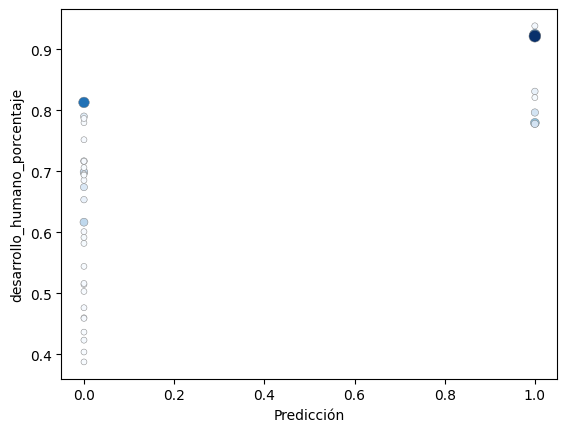

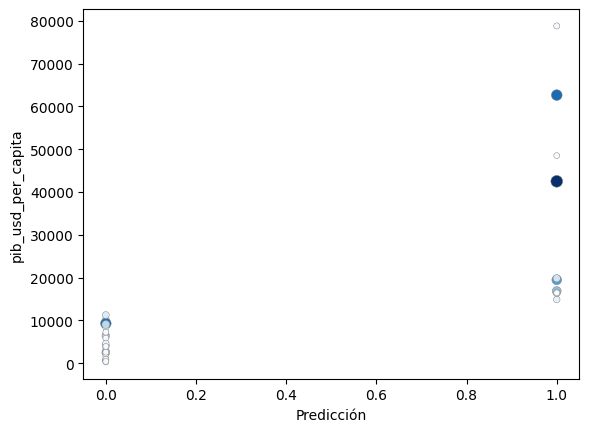

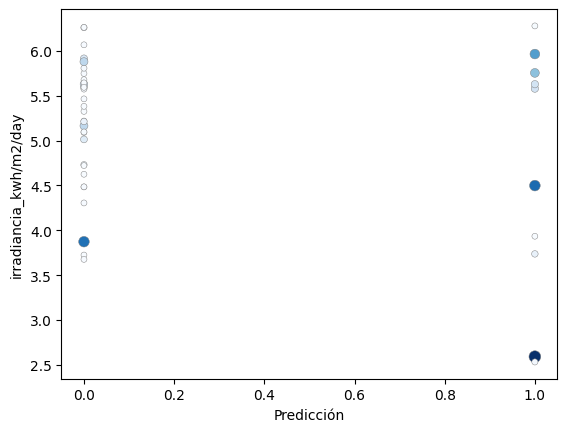

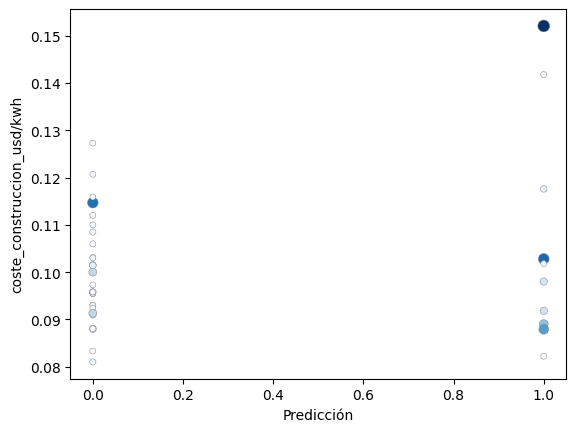

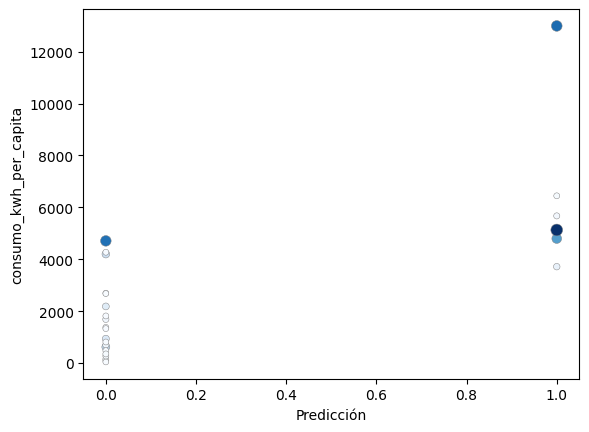

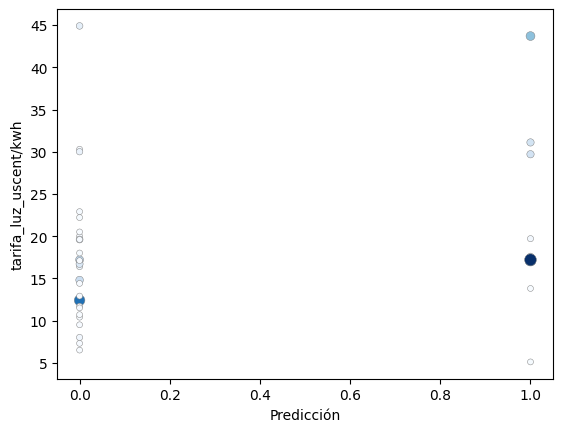

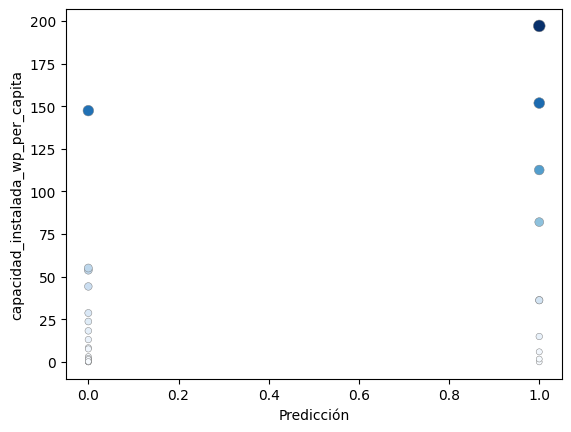

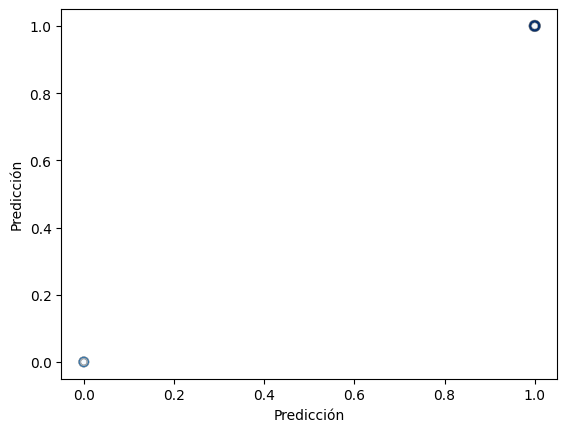

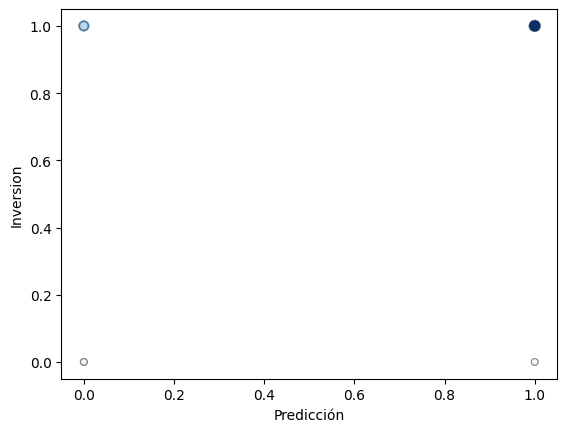

In [315]:
dispersion_3_var(test_set, "Predicción", "capacidad_instalada_wp_per_capita")

In [316]:
test_set.to_csv("./src/data/test_con_solucion.csv")
train_set.to_csv("./src/data/train.csv")

### GRAFICAR PLANO DEL MUNDO

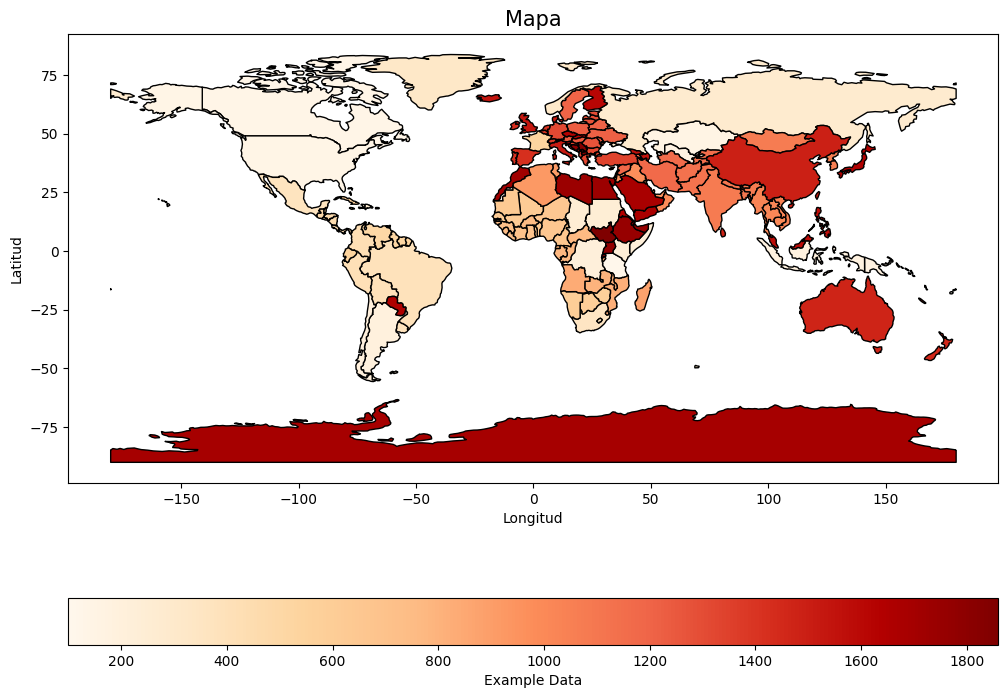

In [317]:
# Cargar el shapefile del mundo
gdf_world = gpd.read_file("./src/data/ne_110m_admin_0_countries.shp")

# Filtrar para mantener solo los países de Europa
# gdf_europe = gdf_world[gdf_world['CONTINENT'] == 'Europe']

# Crear una columna de ejemplo para colorear, puedes reemplazar esto con tus propios datos
# Por ejemplo, podrías agregar una columna con datos de población, PIB, etc.
gdf_world['example_data'] = [100 + i * 10 for i in range(len(gdf_world))]  # Datos de ejemplo

# Crear la visualización
fig, ax = plt.subplots(figsize=(12, 10))

# Dibujar el mapa de Europa con colores basados en 'example_data'
# El parámetro 'cmap' define la paleta de colores
gdf_world.plot(column='example_data', ax=ax, legend=True,
                legend_kwds={'label': "Example Data",
                             'orientation': "horizontal"},
                cmap='OrRd',  # Paleta de colores (puedes cambiar a tu preferencia)
                edgecolor='black')

# Ajustar los detalles del mapa
ax.set_title('Mapa', fontsize=15)
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

# Mostrar el mapa
plt.show()

#Vemos que funciona

In [318]:

def mapa_mundo_num(df, dato):
    
    '''Tenemos que tener índice llamado "pais" en el df.
        Si no hay pais que coincida con el indice saldrá rayado.
    '''

    import geopandas as gpd
    import matplotlib.pyplot as plt
    # Cargar el shapefile del mundo
    gdf_mundo_sin_index = gpd.read_file("./src/data/ne_110m_admin_0_countries.shp")

    # Renombrar la columna para que coincida
    gdf_mundo_sin_index.rename(columns={"NAME": "pais"}, inplace=True)

    # Establecer el índice para poder unirlos
    gdf_mundo_con_index = gdf_mundo_sin_index.copy()
    gdf_mundo_con_index.set_index("pais", inplace=True)

    # Unir el GeoDataFrame con el DataFrame de datos
    gdf_mundo_con_index = gdf_mundo_con_index.join(df)

    # Verificar si la columna 'dato' existe en el DataFrame unido
    if dato not in gdf_mundo_con_index.columns:
        raise ValueError(f"La columna '{dato}' no existe en el DataFrame.")
    
    # Crear la visualización
    fig, ax = plt.subplots(figsize=(20, 8))

    # Dibujar el mapa del mundo con colores basados en 'dato'
    gdf_mundo_con_index.plot(column=dato,
                             ax=ax,
                             legend=True,
                             cmap="Blues",  # Usamos un cmap que refleja valores numéricos
                             edgecolor='grey',
                             linewidth=0.5,
                             missing_kwds={
                                 "color": "white",  # Color para países sin datos en 'dato'
                                 "edgecolor": "grey",  # Mantener contorno gris
                                 "hatch": "////",  # Rayas en lugar de color
                             })
    
    # Dibujar los países que no están en el DataFrame df con rayas (si no tienen el dato)
    missing_data = gdf_mundo_con_index[gdf_mundo_con_index[dato].isna()]
    missing_data.plot(ax=ax,
                      color='white',  # Fondo blanco para los países sin datos
                      edgecolor='grey',  # Contorno gris
                      hatch='////',  # Rayas
                      linewidth=0.5)
    
    # Dibujar línea discontinua en el ecuador (latitud = 0)
    ax.axhline(y=0, color='grey', linestyle='--', linewidth=1, label="Ecuador (Latitud 0)")


    # Ajustar los detalles del mapa
    ax.set_title(dato)
    ax.set_xlabel('Longitud')
    ax.set_ylabel('Latitud')

    # Mostrar el mapa
    plt.show()

In [319]:
train_set.sort_values(by= "capacidad_instalada_wp_per_capita", ascending=False)

desarrollo_humano_porcentaje  \
pais                                                            
Germany                                              0.936043   
Japan                                                0.909153   
Australia                                            0.938631   
Belgium                                              0.916066   
Italy                                                0.879769   
...                                                       ...   
Paraguay                                             0.701662   
Macau, SAR                                                NaN   
Hong Kong, SAR                                       0.932583   
Tajikistan                                           0.650015   
Northern Mariana Islands (U.S.)                           NaN   

                                 pib_usd_per_capita  irradiancia_kwh/m2/day  \
pais                                                                          
Germany                                48195.579904                  2.9777   
Japan                                  39286.737649                  3.6144   
Australia                              57305.299016                  5.7587   
Belgium                                46556.099567                  2.9436   
Italy                                  34318.351124                  4.0721   
...                                             ...                     ...   
Paraguay                                5871.467064                  5.0765   
Macau, SAR                             86355.407652                  4.0875   
Hong Kong, SAR                         48717.291214                  3.9050   
Tajikistan                               826.621531                  4.5133   
Northern Mariana Islands (U.S.)        28163.784873                  5.5614   

                                 coste_construccion_usd/kwh  \
pais                                                          
Germany                                              0.1119   
Japan                                                0.1712   
Australia                                            0.0949   
Belgium                                              0.1219   
Italy                                                0.0673   
...                                                     ...   
Paraguay                                             0.0993   
Macau, SAR                                           0.1047   
Hong Kong, SAR                                       0.1301   
Tajikistan                                           0.0984   
Northern Mariana Islands (U.S.)                      0.0914   

                                 consumo_kwh_per_capita  \
pais                                                      
Germany                                     7035.482975   
Japan                                       7819.714636   
Australia                                  10071.398979   
Belgium                                     7709.123078   
Italy                                       5002.406680   
...                                                 ...   
Paraguay                                    1552.384217   
Macau, SAR                                          NaN   
Hong Kong, SAR                              6083.269936   
Tajikistan                                  1499.485086   
Northern Mariana Islands (U.S.)                     NaN   

                                 tarifa_luz_uscent/kwh  \
pais                                                     
Germany                                           32.2   
Japan                                             18.6   
Australia                                         23.1   
Belgium                                           15.8   
Italy                                             19.3   
...                                                ...   
Paraguay                                           6.5   
Macau, SAR                                       

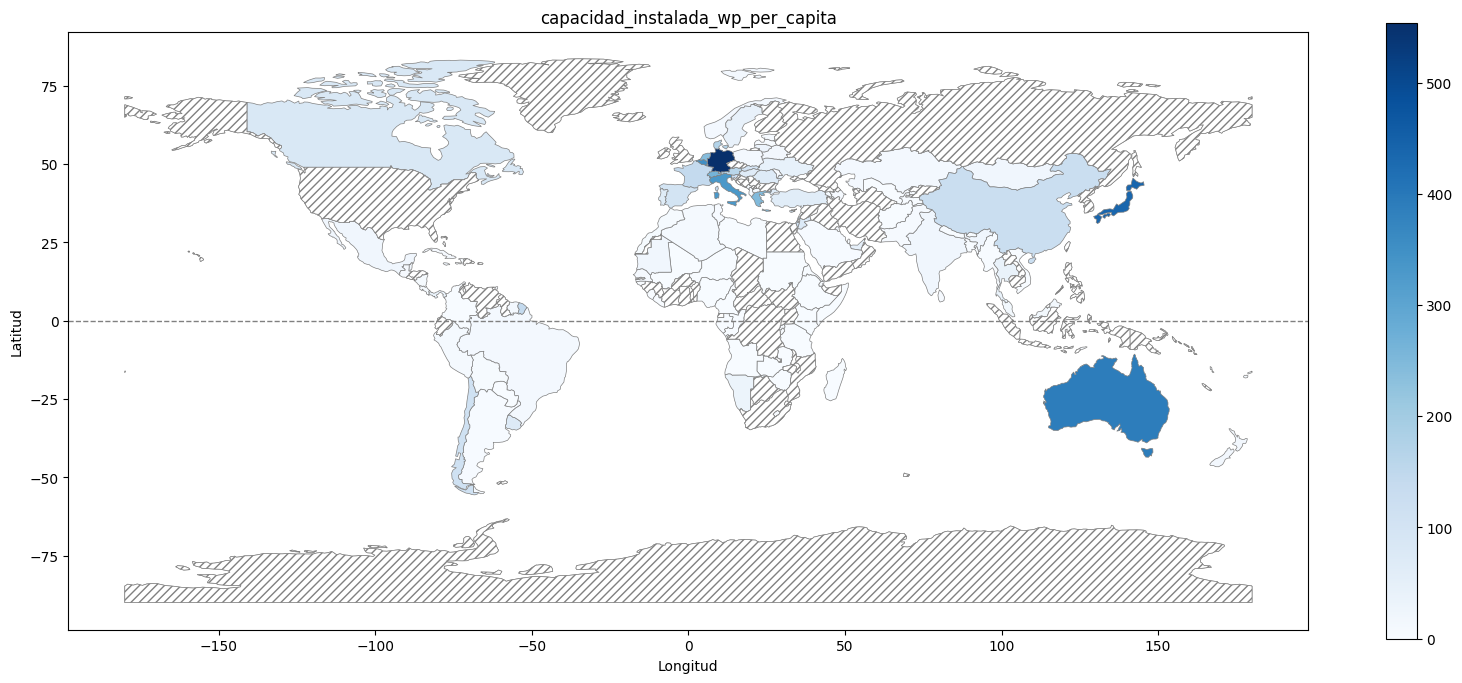

In [320]:
mapa_mundo_num(train_set,'capacidad_instalada_wp_per_capita')

In [349]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

def mapa_binario_naranja(df, dato):
    '''Esta función asume que 'df' tiene un índice llamado "pais" y contiene una columna binaria llamada 'dato'.'''

    # Cargar el shapefile del mundo
    gdf_mundo_sin_index = gpd.read_file("./src/data/ne_110m_admin_0_countries.shp")

    # Renombrar la columna para que coincida
    gdf_mundo_sin_index.rename(columns={"NAME": "pais"}, inplace=True)

    # Establecer el índice para poder unirlos
    gdf_mundo_con_index = gdf_mundo_sin_index.copy()
    gdf_mundo_con_index.set_index("pais", inplace=True)

    # Unir el GeoDataFrame con el DataFrame de datos
    gdf_mundo_con_index = gdf_mundo_con_index.join(df)

    # Verificar si la columna 'dato' existe en el DataFrame unido
    if dato not in gdf_mundo_con_index.columns:
        raise ValueError(f"La columna '{dato}' no existe en el DataFrame.")

    # Crear la visualización
    fig, ax = plt.subplots(figsize=(20, 20))

    # Convertir el dato a tipo binario (0 y 1) en caso de que no lo sea
    gdf_mundo_con_index[dato] = gdf_mundo_con_index[dato].astype('category')

    # Crear la visualización con colores específicos para categorías binarias (0 y 1)
    gdf_mundo_con_index.plot(column=dato,
                             ax=ax,
                             legend=True,
                             cmap="Oranges",  # Usamos un cmap para mostrar claramente la diferencia entre 0 y 1
                             edgecolor='grey',
                             linewidth=0.5,
                             missing_kwds={
                                 "color": "white",  # Color para países sin datos
                                 "edgecolor": "grey",  # Mantener contorno gris
                                 "hatch": "////",  # Rayas para países sin datos
                             })
     # Dibujar línea discontinua en el ecuador (latitud = 0)
    ax.axhline(y=0, color='grey', linestyle='--', linewidth=1, label="Ecuador (Latitud 0)")
    
    # Crear leyenda personalizada
    handles = [
        mpatches.Patch(color='#8B4500', label='Invertir'),  # Color para '1'
        mpatches.Patch(color='#FFEBCC', label='No Invertir')  # Color para '0' (sin datos, fondo blanco)
    ]
    ax.legend(handles=handles, title=dato, loc='upper right')

    # Ajustar los detalles del mapa
    ax.set_title(f"Mapa de {dato}")
    ax.set_xlabel('Longitud')
    ax.set_ylabel('Latitud')

    # Mostrar el mapa
    plt.show()


In [344]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

def mapa_binario_azul(df, dato):
    '''Esta función asume que 'df' tiene un índice llamado "pais" y contiene una columna binaria llamada 'dato'.'''

    # Cargar el shapefile del mundo
    gdf_mundo_sin_index = gpd.read_file("./src/data/ne_110m_admin_0_countries.shp")

    # Renombrar la columna para que coincida
    gdf_mundo_sin_index.rename(columns={"NAME": "pais"}, inplace=True)

    # Establecer el índice para poder unirlos
    gdf_mundo_con_index = gdf_mundo_sin_index.copy()
    gdf_mundo_con_index.set_index("pais", inplace=True)

    # Unir el GeoDataFrame con el DataFrame de datos
    gdf_mundo_con_index = gdf_mundo_con_index.join(df)

    # Verificar si la columna 'dato' existe en el DataFrame unido
    if dato not in gdf_mundo_con_index.columns:
        raise ValueError(f"La columna '{dato}' no existe en el DataFrame.")

    # Crear la visualización
    fig, ax = plt.subplots(figsize=(20, 20))

    # Convertir el dato a tipo binario (0 y 1) en caso de que no lo sea
    gdf_mundo_con_index[dato] = gdf_mundo_con_index[dato].astype('category')

    # Crear la visualización con colores específicos para categorías binarias (0 y 1)
    gdf_mundo_con_index.plot(column=dato,
                             ax=ax,
                             legend=True,
                             cmap="Blues",  # Usamos un cmap para mostrar claramente la diferencia entre 0 y 1
                             edgecolor='grey',
                             linewidth=0.5,
                             missing_kwds={
                                 "color": "white",  # Color para países sin datos
                                 "edgecolor": "grey",  # Mantener contorno gris
                                 "hatch": "////",  # Rayas para países sin datos
                             })
     # Dibujar línea discontinua en el ecuador (latitud = 0)
    ax.axhline(y=0, color='grey', linestyle='--', linewidth=1, label="Ecuador (Latitud 0)")
    
    # Crear leyenda personalizada
    handles = [
        mpatches.Patch(color='darkblue', label='Invertir'),  # Color para '1'
        mpatches.Patch(color='lightblue', label='No Invertir')  # Color para '0' (sin datos, fondo blanco)
    ]
    ax.legend(handles=handles, title=dato, loc='upper right')

    # Ajustar los detalles del mapa
    ax.set_title(f"Mapa de {dato}")
    ax.set_xlabel('Longitud')
    ax.set_ylabel('Latitud')

    # Mostrar el mapa
    plt.show()


In [322]:
X_train.columns

Index(['desarrollo_humano_porcentaje', 'pib_usd_per_capita',
       'irradiancia_kwh/m2/day', 'coste_construccion_usd/kwh',
       'consumo_kwh_per_capita', 'tarifa_luz_uscent/kwh'],
      dtype='object')

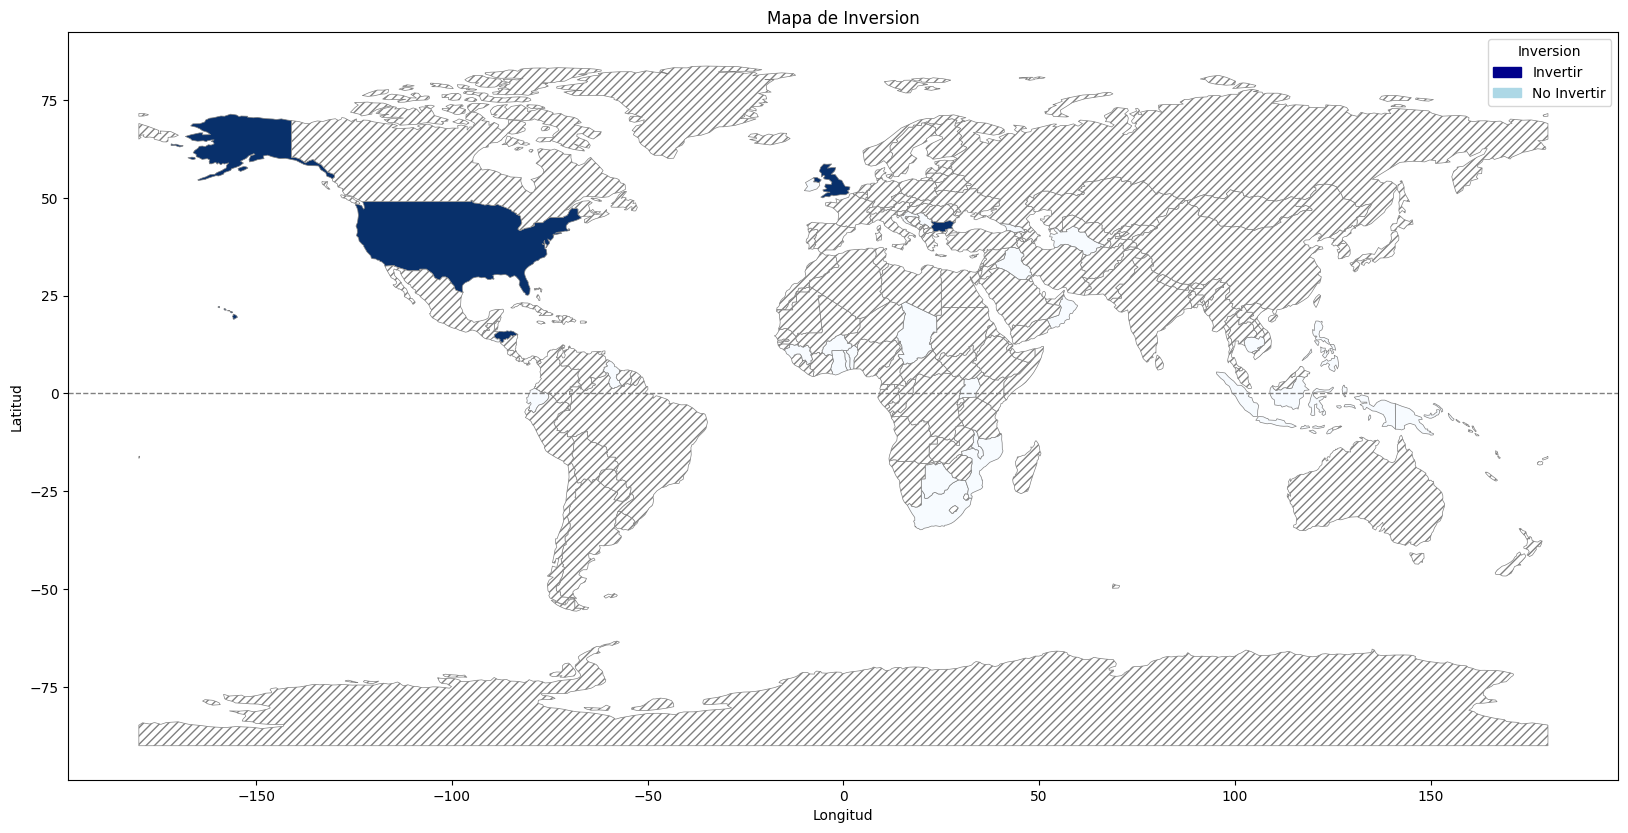

In [345]:
mapa_binario_azul(test_set, "Inversion")

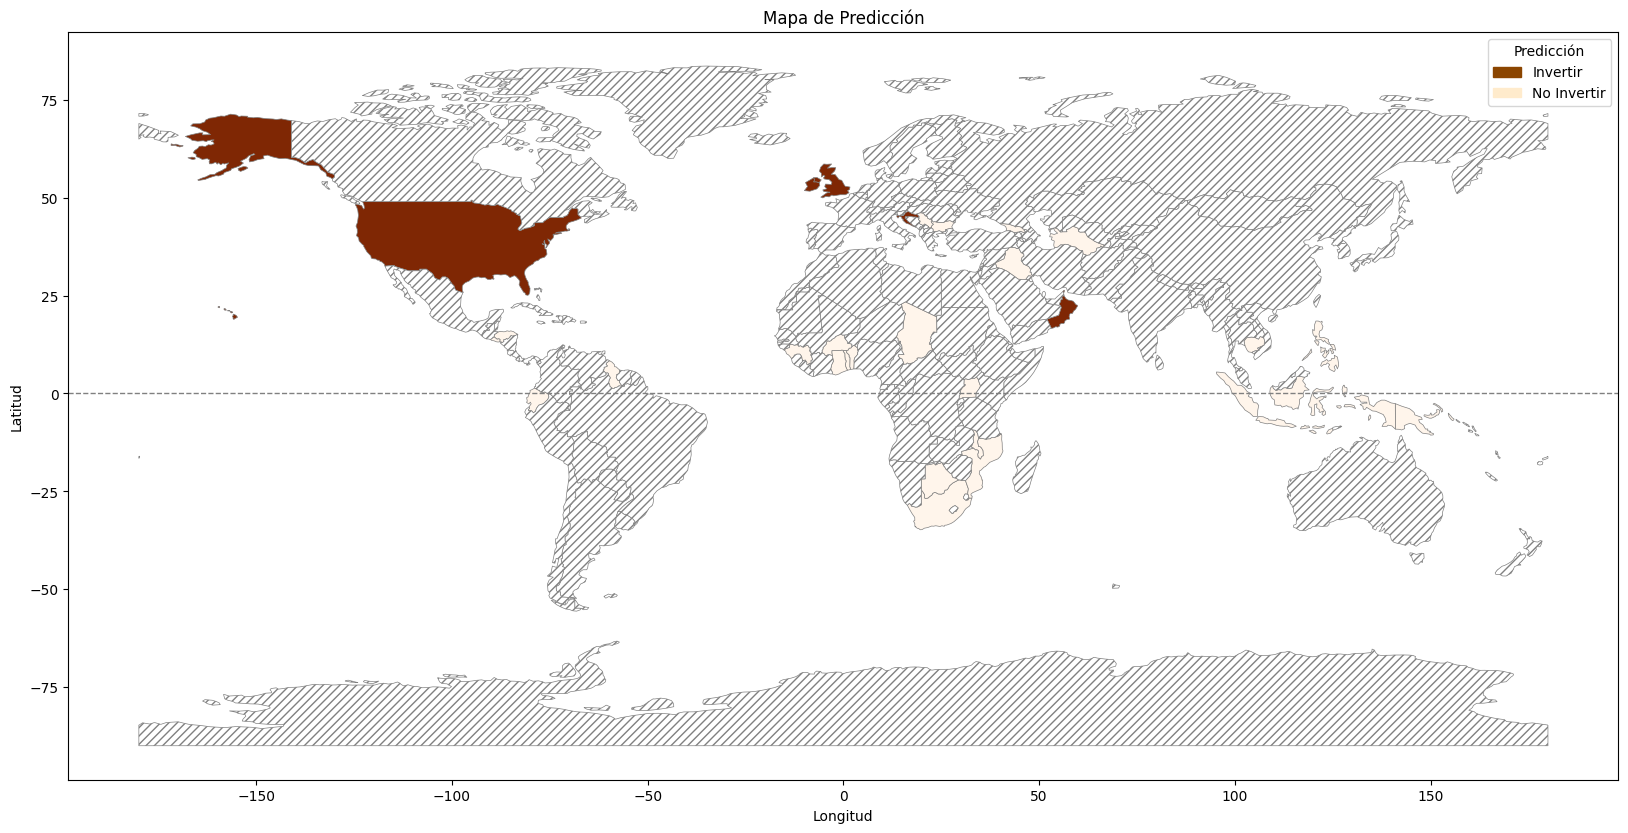

In [350]:
mapa_binario_naranja(test_set, "Predicción")

In [325]:
df_global.sort_values(by="capacidad_instalada_wp_per_capita", ascending=False)

desarrollo_humano_porcentaje  pib_usd_per_capita  \
pais                                                               
Germany                             0.936043        48195.579904   
Japan                               0.909153        39286.737649   
Australia                           0.938631        57305.299016   
Belgium                             0.916066        46556.099567   
Italy                               0.879769        34318.351124   
...                                      ...                 ...   
Bermuda (U.K.)                           NaN                 NaN   
Georgia                             0.779822         4344.630952   
San Marino                               NaN        48494.551411   
Liechtenstein                       0.916083       165028.245029   
Paraguay                            0.701662         5871.467064   

                irradiancia_kwh/m2/day  coste_construccion_usd/kwh  \
pais                                                                 
Germany                         2.9777                      0.1119   
Japan                           3.6144                      0.1712   
Australia                       5.7587                      0.0949   
Belgium                         2.9436                      0.1219   
Italy                           4.0721                      0.0673   
...                                ...                         ...   
Bermuda (U.K.)                  4.7291                      0.1015   
Georgia                         3.7245                      0.1150   
San Marino                      3.9336                      0.1018   
Liechtenstein                   3.1691                      0.1277   
Paraguay                        5.0765                      0.0993   

                consumo_kwh_per_capita  tarifa_luz_uscent/kwh  \
pais                                                            
Germany                    7035.482975                   32.2   
Japan                      7819.714636                   18.6   
Australia                 10071.398979                   23.1   
Belgium                    7709.123078                   15.8   
Italy                      5002.406680                   19.3   
...                                ...                    ...   
Bermuda (U.K.)                     NaN                    NaN   
Georgia                    2693.972760                    6.5   
San Marino                         NaN                   13.8   
Liechtenstein                      NaN                    9.3   
Paraguay                   1552.384217                    6.5   

                capacidad_instalada_wp_per_capita  
pais                                               
Germany                                553.854467  
Japan                                  438.634275  
Australia                              390.643240  
Belgium                                352.440556  
Italy                                  332.940143  
...                                           ...  
Bermuda (U.K.)                           0.000000  
Georgia                                  0.000000  
San Marino                               0.000000  
Liechtenstein                            0.000000  
Paraguay                                 0.000000  

[203 rows x 7 columns]

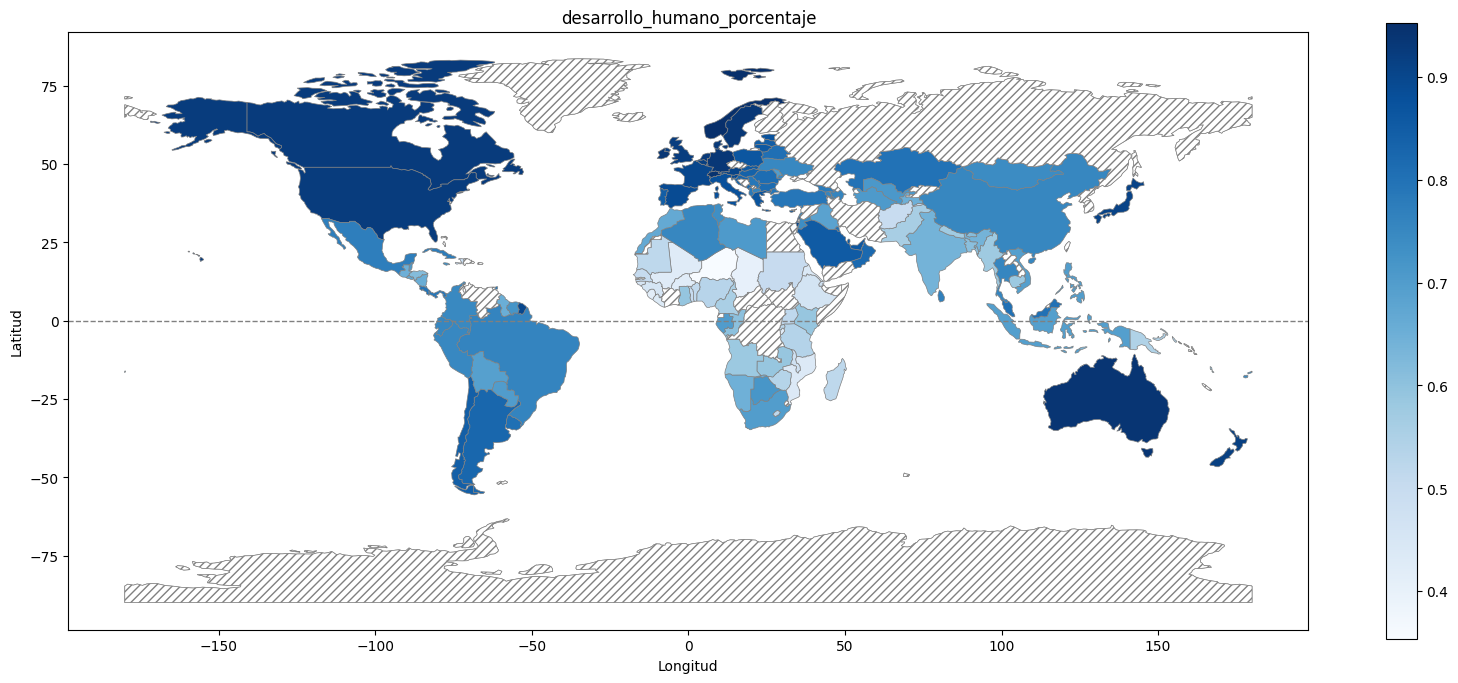

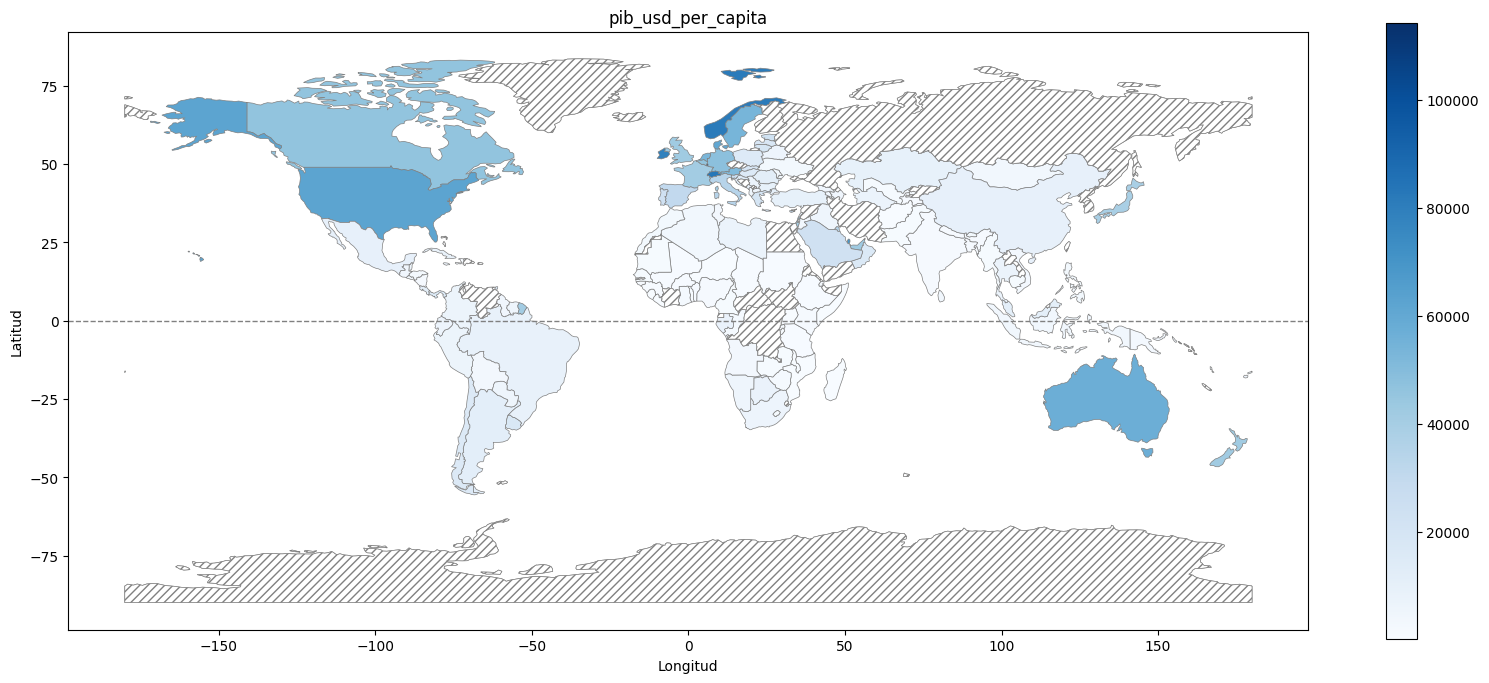

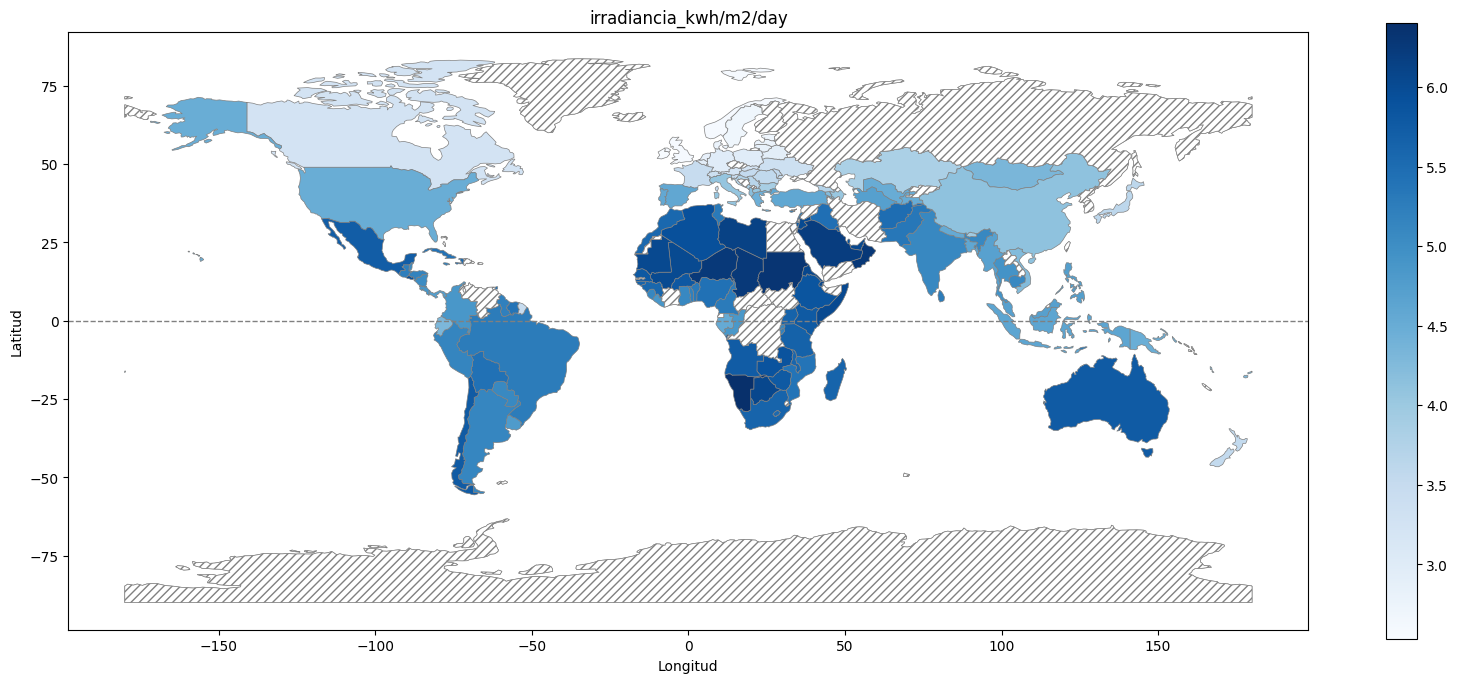

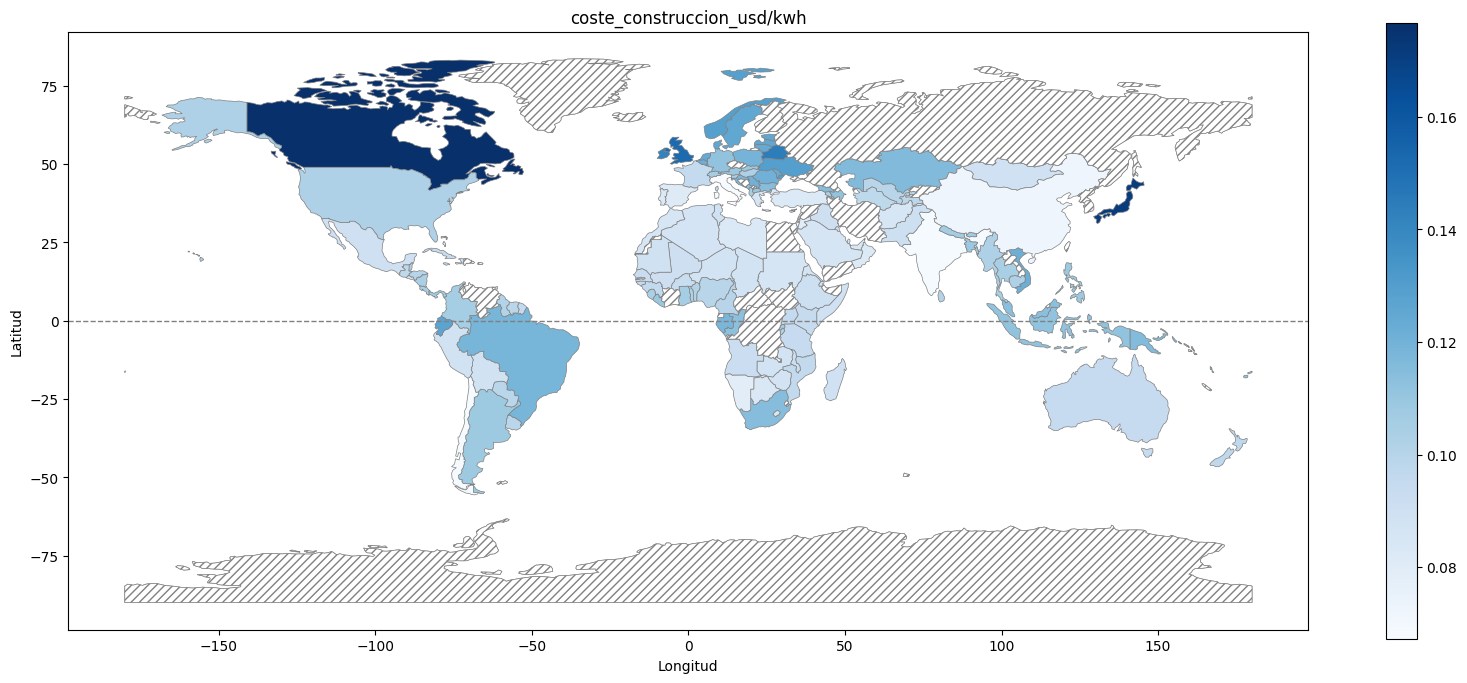

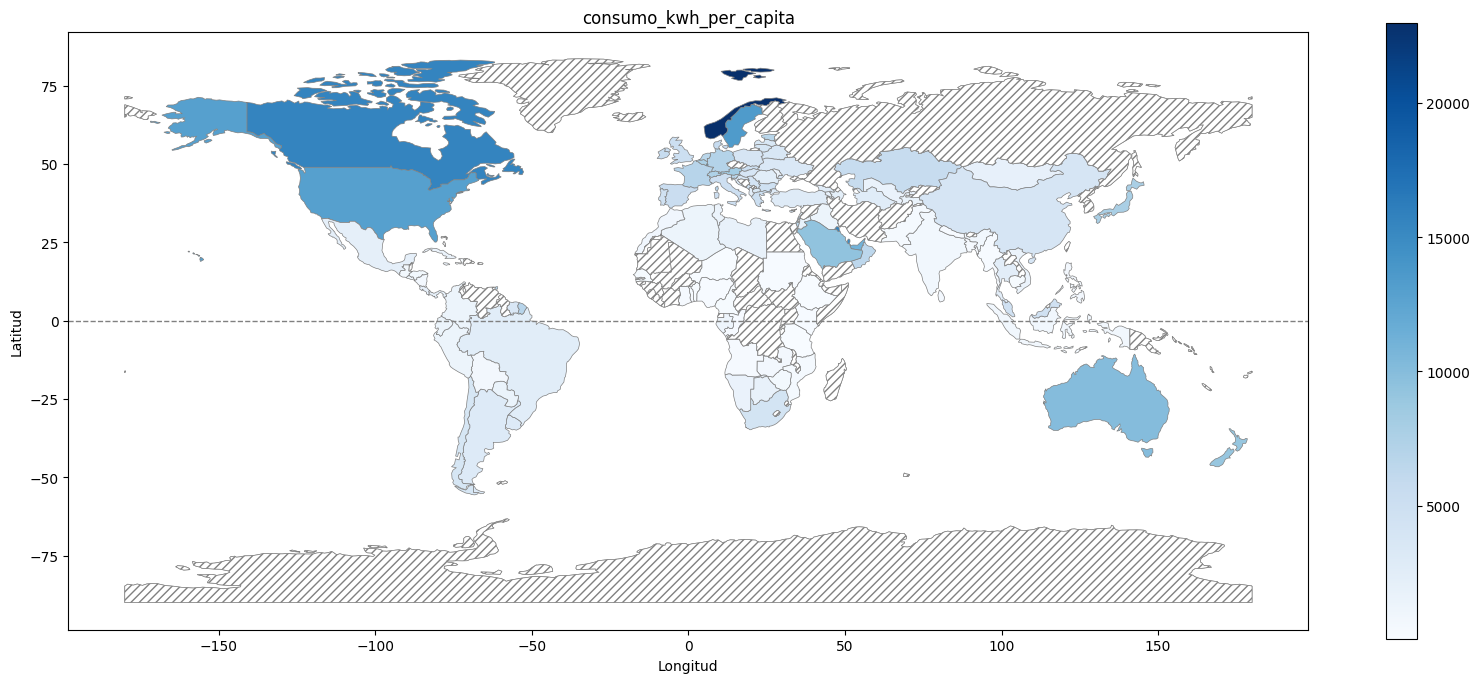

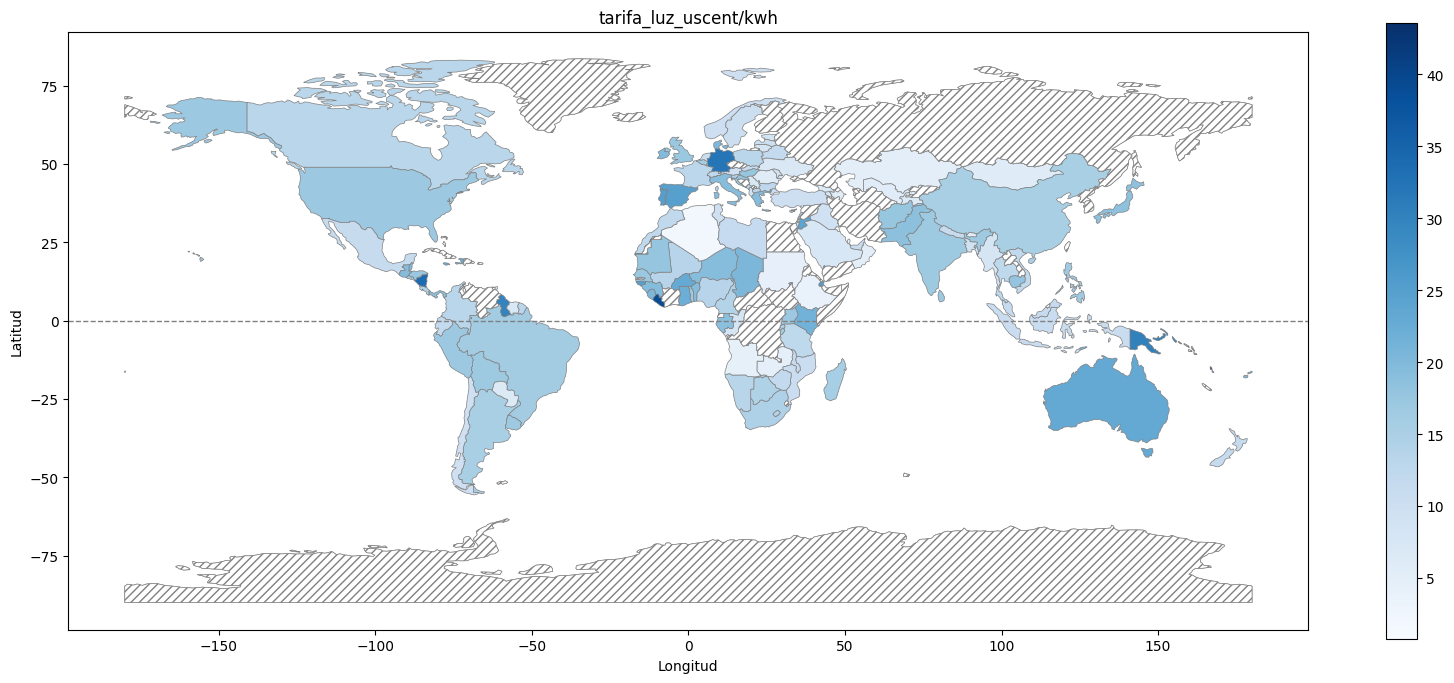

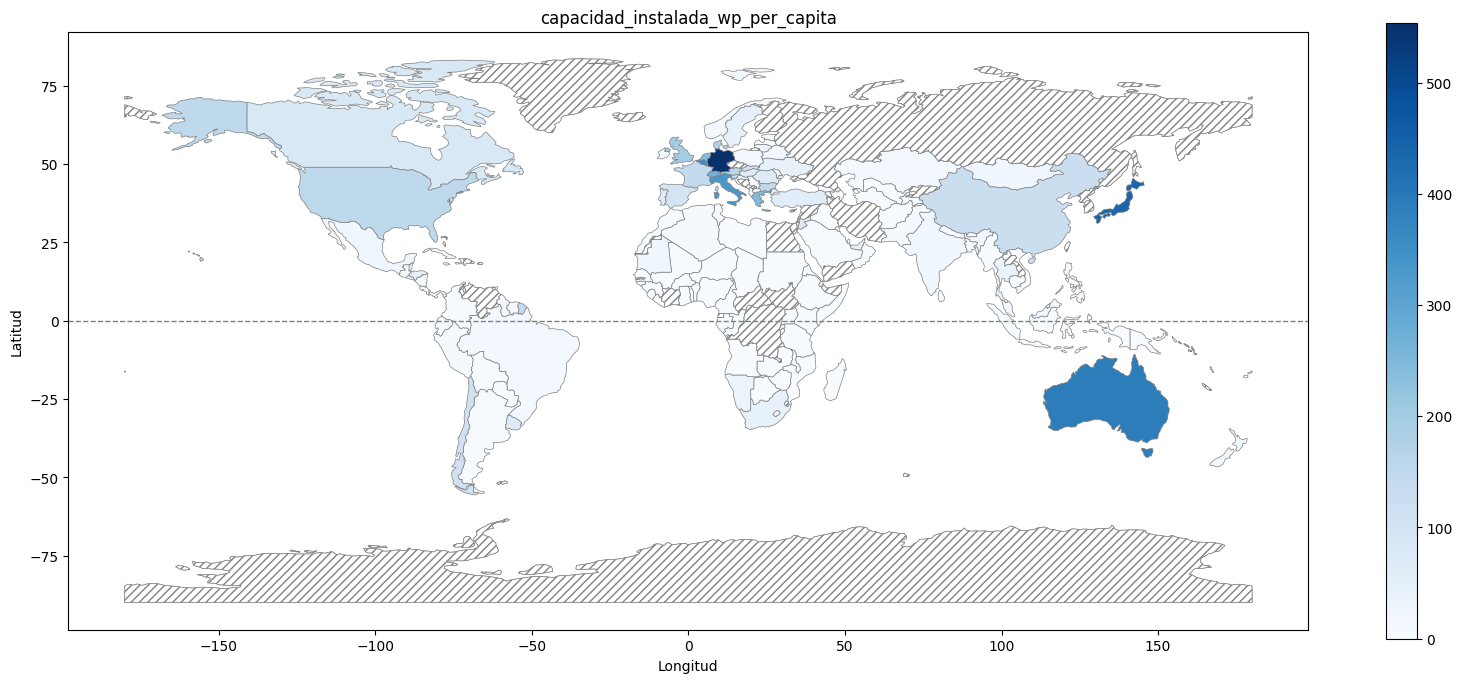

In [326]:
for dato in train_set.columns:
    mapa_mundo_num(df_global, dato)

In [375]:
# Filtrar filas donde "Predicción" es igual a "Inversion"
filtrado_aciertos = test_set[test_set["Predicción"] == test_set["Inversion"]]
filtrado_aciertos_oportunidad = filtrado_aciertos[filtrado_aciertos["Predicción"] == 1]
filtrado_aciertos_oportunidad

desarrollo_humano_porcentaje  pib_usd_per_capita  \
pais                                                                         
Antigua and Barbuda                           0.779536        16864.383361   
Curaçao (Neth.)                                    NaN        19457.531523   
United States of America                      0.923914        62641.014570   
United Kingdom                                0.921549        42491.364435   

                          irradiancia_kwh/m2/day  coste_construccion_usd/kwh  \
pais                                                                           
Antigua and Barbuda                       5.7543                      0.0890   
Curaçao (Neth.)                           5.9645                      0.0879   
United States of America                  4.4984                      0.1028   
United Kingdom                            2.5918                      0.1521   

                          consumo_kwh_per_capita  tarifa_luz_uscent/kwh  \
pais                                                                      
Antigua and Barbuda                          NaN                   43.7   
Curaçao (Neth.)                      4797.670436                    NaN   
United States of America            12993.961825                   17.1   
United Kingdom                       5129.527793                   17.2   

                          capacidad_instalada_wp_per_capita  Predicción  \
pais                                                                      
Antigua and Barbuda                               82.047234           1   
Curaçao (Neth.)                                  112.606272           1   
United States of America                         151.885533           1   
United Kingdom                                   197.145419           1   

                          Inversion  
pais                                 
Antigua and Barbuda               1  
Curaçao (Neth.)                   1  
United States of America          1  
United Kingdom                    1

In [363]:
# Filtrar filas donde "Predicción" es igual a "Inversion"
filtrado_fallos = test_set[test_set["Predicción"] != test_set["Inversion"]]
filtrado_fallos.count()

desarrollo_humano_porcentaje         7
pib_usd_per_capita                   9
irradiancia_kwh/m2/day               9
coste_construccion_usd/kwh           9
consumo_kwh_per_capita               5
tarifa_luz_uscent/kwh                8
capacidad_instalada_wp_per_capita    9
Predicción                           9
Inversion                            9
dtype: int64

In [364]:
filtrado_fallos

desarrollo_humano_porcentaje  pib_usd_per_capita  \
pais                                                                      
Honduras                                   0.616717         2482.730206   
Bulgaria                                   0.813006         9272.629304   
Croatia                                    0.831102        14869.090682   
Saint Kitts and Nevis                      0.777845        19829.428317   
Seychelles                                 0.796529        16433.935287   
San Marino                                      NaN        48494.551411   
Oman                                       0.820989        16418.926928   
Nauru                                           NaN         9030.071064   
Ireland                                    0.938410        78806.431996   

                       irradiancia_kwh/m2/day  coste_construccion_usd/kwh  \
pais                                                                        
Honduras                               5.1649                      0.1000   
Bulgaria                               3.8729                      0.1147   
Croatia                                3.7370                      0.1176   
Saint Kitts and Nevis                  5.5789                      0.0918   
Seychelles                             5.6284                      0.0980   
San Marino                             3.9336                      0.1018   
Oman                                   6.2779                      0.0822   
Nauru                                  5.8795                      0.0913   
Ireland                                2.5330                      0.1418   

                       consumo_kwh_per_capita  tarifa_luz_uscent/kwh  \
pais                                                                   
Honduras                           619.836395                   17.2   
Bulgaria                          4708.927458                   12.4   
Croatia                           3714.382988                   17.6   
Saint Kitts and Nevis                     NaN                   29.7   
Seychelles                                NaN                   31.1   
San Marino                                NaN                   13.8   
Oman                              6445.573417                    5.1   
Nauru                                     NaN                    NaN   
Ireland                           5672.064134                   19.7   

                       capacidad_instalada_wp_per_capita  Predicción  \
pais                                                                   
Honduras                                       53.819955           0   
Bulgaria                                      147.432824           0   
Croatia                                        14.916614           1   
Saint Kitts and Nevis                          36.231193           1   
Seychelles                                     36.171224           1   
San Marino                                      0.000000           1   
Oman                                            1.697904           1   
Nauru                                          55.100756           0   
Ireland                                         5.913251           1   

                       Inversion  
pais                              
Honduras                       1  
Bulgaria                       1  
Croatia                        0  
Saint Kitts and Nevis          0  
Seychelles                     0  
San Marino                     0  
Oman                           0  
Nauru                          1  
Ireland                        0

In [366]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_set["Inversion"], test_set["Predicción"])
cm

array([[28,  6],
       [ 3,  4]], dtype=int64)

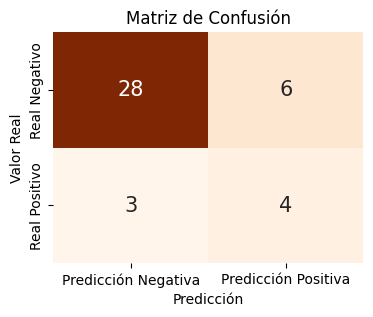

In [372]:
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='g', cmap='Oranges', cbar=False,
            xticklabels=["Predicción Negativa", "Predicción Positiva"],
            yticklabels=["Real Negativo", "Real Positivo"],
            annot_kws={"size": 15})  # Aumentar el tamaño de los números)

# Títulos y etiquetas
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Valor Real")

# Mostrar la matriz de confusión
plt.show()